# High Dimension Heavily Correlated Dataset Data Scientist Challenge
## By Craig Sim

The following questions refer to the data set defined in the tab-delimited file dataset_challenge_one.tsv. The first line in the file contains column headers. Each line after the header line represents a sample from an experiment. There are 1553 columns in the file that correspond with variables measured for each sample, starting with column Variable_1 and ending with column Variable_1553. There is also a column called class which has values of 0 and 1 for each sample row.


## Abstract

The following notebook covers the analysis of the Data Science Challenge One dataset. The analysis intially explores the variance, probability density and correlation relationships and features within the dataset using visual analytical approaches: distribution plots, violin plots, swarm plots and heatmaps. There will be an exploration into initial feature selection based on the outcome of the dataset distribution and correlation analysis. Subsequently a Prinicpal Components Analysis PCA is carried out on the dataset and a PCA1 v's PCA2 scatterplot is rendered. Addtional diagrams and commentary are added for the datasets correlation relationship with the classification label "class" and a distribution exploration and a multidimensional analysis is carried out on PCA1 regarding its correlation relationship with the dataset and its most promenent co-linear feature. Finally we will explore classifying the data using K Nearest Neighbour and feature selections based on PCA dimensionality reduction and also utilising the outcome of the dataset visual analytic analysis. The study finds that the clean dataset has a high number of dimensions with low number of observations and that the feature set is heavily correlated with low variance and a weak correlation to the classification label "class". There are only a few features that exhibit classification distributions against the "class" label, but they are also weak. As the dataset exhibited low variance, a high bias machine learning predictive model was selected and with feature selection and PCA analysis a modest improvement to generalisation was observed. 

First task is to load the dataset prior to exploration.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings
import datetime

from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from sklearn import manifold
from sklearn.metrics.pairwise import euclidean_distances

warnings.filterwarnings('ignore')

df = pd.read_csv('./dataset_challenge_one.tsv', sep='\t')
pd.set_option('display.max_columns', None)
df.head()

Variable_1  Variable_2  Variable_3  Variable_4  Variable_5  Variable_6  \
0   -0.954246    0.051024   -0.111203   -0.050066   -0.340897   -0.038770   
1    0.244626   -0.199602   -0.111397   -0.135207    0.026813   -0.165675   
2    0.082434   -0.156199   -0.084980   -0.179003   -0.490377   -0.193691   
3   -1.071614   -0.206041   -0.051775   -0.049676   -0.306176    0.061596   
4   -0.982276   -0.514666   -0.118483   -0.086523   -0.377659   -0.093353   

   Variable_7  Variable_8  Variable_9  Variable_10  Variable_11  Variable_12  \
0   -0.104256   -0.485671   -0.565482     0.159871     0.198546     0.131750   
1    0.081549   -0.736914    0.118127    -0.183824     0.265609    -0.080799   
2    0.186532   -0.801328    0.128750     0.403489     0.161287     0.030411   
3    0.115982   -0.842997   -0.020820    -0.189779    -0.003238     0.450045   
4    0.302795   -0.794573   -0.001558    -0.210314     0.046650    -0.151043   

   Variable_13  Variable_14  Variable_15  Variable_16  Variable_17  \
0     0.600214     0.034498     0.492915     0.032284     0.020498   
1    -0.034788     0.146600     0.096864     0.043611     0.049600   
2    -0.074798    -0.190267     0.111516    -0.212994    -0.083166   
3    -0.024921    -0.187729     0.012188    -0.110403    -0.036232   
4    -0.016541    -0.168022     0.048334    -0.049165    -0.060926   

   Variable_18  Variable_19  Variable_20  Variable_21  Variable_22  \
0     0.162939    -0.026182     0.090109    -0.110716     0.025322   
1     0.150307    -0.150096    -0.082436    -0.117535    -0.245531   
2     0.363167    -0.202888     0.037665    -0.061916     0.082368   
3    -0.014174    -0.192298    -0.116583    -0.117127    -0.082694   
4    -0.060485    -0.061257    -0.018171    -0.057568     0.033263   

   Variable_23  Variable_24  Variable_25  Variable_26  Variable_27  \
0     0.690928     0.764825     0.579042     0.039256    -0.112008   
1    -0.070265     0.046395     0.055705     0.088564    -0.090754   
2     0.048723    -0.030065     0.166866    -0.145519    -0.039055   
3    -0.005107    -0.074346     0.090662     0.214941    -0.114225   
4     0.070836    -0.028673     0.103178     0.081241    -0.029509   

   Variable_28  Variable_29  Variable_30  Variable_31  Variable_32  \
0    -0.014334     0.012805     0.746400    -0.020099    -0.070284   
1    -0.200864    -0.071210    -0.418519    -0.105610    -0.072491   
2     0.108837     0.037011    -0.117579    -0.096034    -0.056609   
3    -0.112160    -0.108567    -0.192184    -0.090999    -0.093462   
4    -0.065523    -0.073158    -0.294788    -0.056577    -0.063829   

   Variable_33  Variable_34  Variable_35  Variable_36  Variable_37  \
0    -0.410170     0.139930     0.313297     0.645509    -0.122269   
1     0.086513    -0.014931    -0.060254     0.005230    -0.151410   
2    -0.076556     0.258624     0.101771     0.137174    -0.160126   
3    -0.587146     0.095157     0.029532     0.038152    -0.055742   
4     0.126302     0.051351     0.016544    -0.051147    -0.150516   

   Variable_38  Variable_39  Variable_40  Variable_41  Variable_42  \
0    -0.082007     0.351892     0.208250     0.064086    -0.436356   
1    -0.282336     0.023717     0.139540    -0.109258    -0.242563   
2     0.024189     0.082768     0.252660     0.038133    -0.502416   
3    -0.056952    -0.234063    -0.045315     0.014587    -0.312572   
4    -0.166902    -0.129874    -0.212843    -0.187535    -0.425278   

   Variable_43  Variable_44  Variable_45  Variable_46  Variable_47  \
0    -0.061120    -0.218654    -0.063444    -0.458989    -0.042714   
1    -0.046313    -0.077276    -0.101312    -0.463026    -0.080892   
2    -0.085013    -0.070318    -0.103448    -0.514130    -0.082062   
3    -0.106923    -0.589406    -0.041847    -0.521765    -0.091159   
4    -0.052321    -0.127992    -0.053063    -0.142176    -0.107002   

   Variable_48  Variable_49  Variable_50  Variable_51  Variable_52  \
0     0.107555    -0.046282    -0.607396  


# 1) Explore the data, and candidate feature extractions

### Question 1):
Provide summary statistics and at least three visualizations for the variable columns (one at a time, or in combination). In a brief paragraph, summarize the distributions for variable values and explain your choices for visualization. Are there any anomalous distributions for variables? How did you determine this? 

### Answer:
This question will be answered with commentary on each visualisation and summarised at the end of section 1. 

In section 1 I will explore dataset description overview, variance, probability density distributions, correlations and classification label clusters within feature variances.


## 1 a) Describe the dataset 

The dataset is entirely numeric and contains no missing fields. It has not been scaled so this will need to be done prior to any feature comparisons.

There are only 272 observations for the 1553 feature dimensions, this may make prediction generalisation a challenge. "class" is our class label and its a binary classifcation of either 0 or 1. There appears to be no supriously populated feature columns, so theres no requirement to drop columns at this stage.


In [2]:
df.describe()

Variable_1  Variable_2  Variable_3  Variable_4  Variable_5  Variable_6  \
count  272.000000  272.000000  272.000000  272.000000  272.000000  272.000000   
mean    -0.025154   -0.042121   -0.019142    0.037009   -0.194510   -0.061548   
std      0.626507    0.376843    0.301998    0.347107    0.387954    0.320156   
min     -1.951243   -2.000000   -2.000000   -1.132837   -1.447581   -2.000000   
25%     -0.165442   -0.160641   -0.106249   -0.077732   -0.358526   -0.203514   
50%      0.056432   -0.049159   -0.029375    0.003066   -0.223017   -0.106265   
75%      0.213871    0.099495    0.041888    0.064462   -0.083519    0.044360   
max      1.897414    2.000000    2.000000    2.000000    2.000000    2.000000   

       Variable_7  Variable_8  Variable_9  Variable_10  Variable_11  \
count  272.000000  272.000000  272.000000   272.000000   272.000000   
mean    -0.176837   -0.553139   -0.123134    -0.128201     0.070100   
std      0.379778    0.430015    0.367952     0.309881     0.304969   
min     -1.282915   -1.264297   -1.105607    -0.966596    -2.000000   
25%     -0.394982   -0.802160   -0.439376    -0.292065    -0.009362   
50%     -0.096464   -0.641877   -0.043508    -0.183556     0.074350   
75%      0.069604   -0.429992    0.156628    -0.067523     0.180524   
max      0.941710    1.555690    0.643989     1.172441     2.000000   

       Variable_12  Variable_13  Variable_14  Variable_15  Variable_16  \
count   272.000000   272.000000   272.000000   272.000000   272.000000   
mean     -0.102652    -0.009374    -0.177207     0.102282     0.057819   
std       0.354060     0.296418     0.335010     0.361381     0.279605   
min      -2.000000    -2.000000    -2.000000    -2.000000    -2.000000   
25%      -0.280563    -0.056307    -0.392286     0.036779    -0.029369   
50%      -0.087809     0.013097    -0.150620     0.113231     0.041705   
75%       0.116990     0.089334     0.026081     0.206634     0.114217   
max       0.682449     1.652653     1.189180     2.000000     2.000000   

       Variable_17  Variable_18  Variable_19  Variable_20  Variable_21  \
count   272.000000   272.000000   272.000000   272.000000   272.000000   
mean      0.047847    -0.081122    -0.014862     0.025684     0.028062   
std       0.302734     0.331460     0.278023     0.277829     0.242177   
min      -1.334842    -1.084580    -2.000000    -2.000000    -0.951796   
25%      -0.054754    -0.285268    -0.072822    -0.029686    -0.038103   
50%       0.029485    -0.097806    -0.005639     0.037588     0.022776   
75%       0.091780     0.097938     0.048465     0.116520     0.096386   
max       2.000000     2.000000     2.000000     2.000000     2.000000   

       Variable_22  Variable_23  Variable_24  Variable_25  Variable_26  \
count   272.000000   272.000000   272.000000   272.000000   272.000000   
mean      0.019720     0.037345     0.011539     0.056904    -0.058896   
std       0.268799     0.294632     0.312333     0.322752     0.294138   
min      -1.541347    -2.000000    -2.000000    -2.000000    -2.000000   
25%      -0.028384    -0.041608    -0.037442    -0.015401    -0.185033   
50%       0.027123     0.036270     0.040186     0.063348    -0.011513   
75%       0.087289     0.135390     0.113942     0.145318     0.112271   
max       2.000000     2.000000     2.000000     2.000000     0.428750   

       Variable_27  Variable_28  Variable_29  Variable_30  Variable_31  \
count   272.000000   272.000000   272.000000   272.000000   272.000000   
mean      0.009072    -0.005029     0.018235    -0.081096    -0.014480   
std       0.327574     0.281385     0.245510     0.316351     0.291237   
min      -1.372153    -0.659827    -0.843492    -0.899504    -2.000000   
25%      -0.094131    -0.117470    -0.075897    -0.268748    -0.041486   
50%       0.006488    -0.025906     0.010675    -0.080894     0.007307   
75%       0.084116     0.052331     0.083591     0.120830     0.049457   
max       2.000000     2.000000     2.000000

In [3]:
# y includes our labels and x includes our features
Y = df.iloc[:, 1553]                          # M or B 
listy = ['class']
x = df.drop(listy,axis = 1 )

## Count of class label

There are clearly more 0 classifications than 1 classifications, this gives us a lopsided bernoulli distribution to compare our feature dimension against.

Number of Zero's:  195
Number of One's :  77


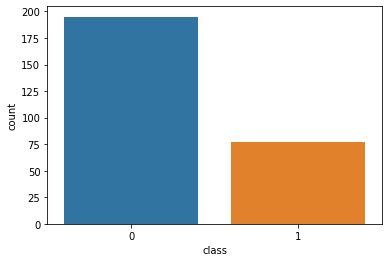

In [4]:
ax = sns.countplot(Y,label="Count")
Zero, One = Y.value_counts()
print('Number of Zero\'s: ',Zero)
print('Number of One\'s : ',One)

## Variance 
Let's explore the variance distribution across all dimensions

We'll use a distribution plot and Multidimensional Scaling to get a visual analytic sense of the variance realtionships within the datase.

First we'll min max scale the data then visualise with a distribution plot

### Commentary:

The dataset has a very low variance across all feature dimensions, this means we will most likely require a high bias predictive algorthim in section 4 of this study.

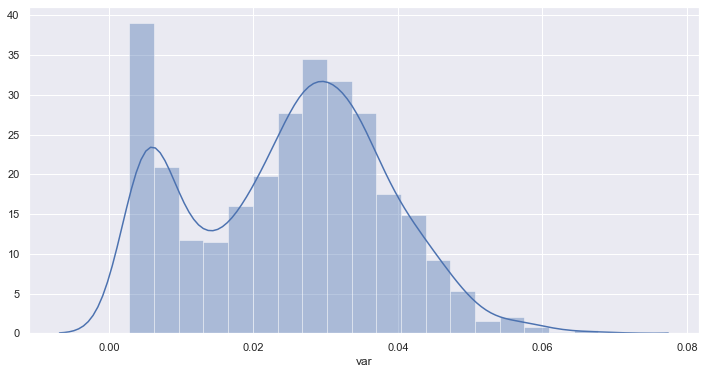

            label       var
2   Variable_1460  0.067728
3    Variable_118  0.065722
4    Variable_410  0.062089
5    Variable_771  0.060105
6    Variable_184  0.059921
7   Variable_1468  0.059084
8    Variable_839  0.058987
9    Variable_941  0.057255
10  Variable_1144  0.057175
11   Variable_990  0.056963


In [5]:
dfnorm = (x-x.min())/(x.max()-x.min())
dfvar = dfnorm.var()
dfvar = dfvar.sort_values(ascending=False)
pdvar = pd.DataFrame(dfvar, columns=['var'])
pdvar.index.name = 'label'
mod_pdvar = pdvar.reset_index()
mod_pdvar1 = mod_pdvar.drop(mod_pdvar.index[0])
mod_pdvar2 = mod_pdvar1.drop(mod_pdvar1.index[0])
sns.set()
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(mod_pdvar2['var']);
plt.show()
print(mod_pdvar2.head(10))


### Visualise the distances in the Variance distribution

Lets use multidimensional scaling to visualise the variance distribution

#### Commentary

This visualisation reiterates what little difference there is in the variance distribution, with only a handful of features exhibiting outlying values. Feature with the high variance value is highlighted in the visualisation.

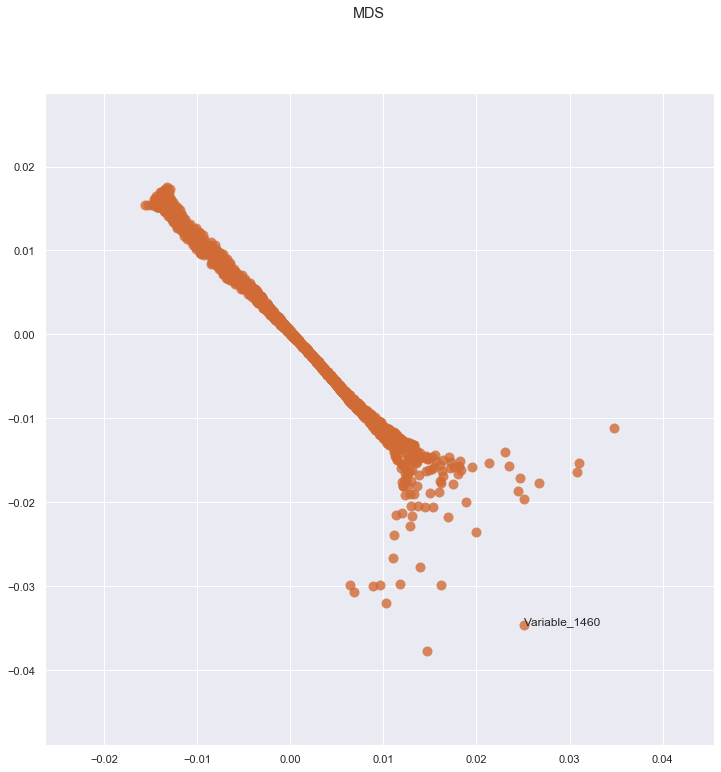

            label       var
2   Variable_1460  0.067728
3    Variable_118  0.065722
4    Variable_410  0.062089
5    Variable_771  0.060105
6    Variable_184  0.059921
7   Variable_1468  0.059084
8    Variable_839  0.058987
9    Variable_941  0.057255
10  Variable_1144  0.057175
11   Variable_990  0.056963


In [6]:
################################################################################
#########MDS Analysis, let see what pattern emerges ############################
################################################################################
sns.set()
numericColumns1 = mod_pdvar2._get_numeric_data()
# keep place names and store them in a 
tnames = mod_pdvar2.label
# let's fill the missing values with mean()
numericColumns1 = numericColumns1.fillna(numericColumns1.mean())
# let's centralize the data
numericColumns1 -= numericColumns1.mean()
# now we compute the euclidean distances between the columns by passing the same data twice
distMatrix1 = euclidean_distances(numericColumns1, numericColumns1)
# first we generate an MDS object which returns
mds1 = manifold.MDS(n_components = 2, max_iter=3000, n_init=1, dissimilarity="precomputed")
Y11 = mds1.fit_transform(distMatrix1)

fig, ax = plt.subplots(figsize=(12,12))
plt.suptitle('MDS')
ax.scatter(Y11[:, 0], Y11[:, 1], c="#D06B36", s = 100, alpha = 0.8, linewidth='0')

for i, txt in enumerate(tnames):
    if(txt == mod_pdvar2.iloc[0, 0]): #Only show "Variable_63"
        ax.annotate(txt, (Y11[:, 0][i],Y11[:, 1][i]))

plt.show()
print(mod_pdvar2.head(10))



## Correlations

Lets now explore the correlations within the dataset i.e. between all the features ignoring the class label until later sections.

#### “a good feature subset is one that contains features highly correlated with the class label, yet uncorrelated with each other.” 

In [7]:
corr = pd.DataFrame()
corr = df.corr()
corr

Variable_1  Variable_2  Variable_3  Variable_4  Variable_5  \
Variable_1       1.000000    0.064762   -0.005974    0.023928    0.095135   
Variable_2       0.064762    1.000000    0.463131    0.454652    0.397596   
Variable_3      -0.005974    0.463131    1.000000    0.656110    0.355100   
Variable_4       0.023928    0.454652    0.656110    1.000000    0.383048   
Variable_5       0.095135    0.397596    0.355100    0.383048    1.000000   
...                   ...         ...         ...         ...         ...   
Variable_1550   -0.079465    0.106892   -0.043829   -0.036482    0.036146   
Variable_1551    0.040540   -0.216012   -0.040512   -0.014213    0.073367   
Variable_1552   -0.068886    0.174904    0.085076    0.053973    0.097841   
Variable_1553   -0.098141   -0.035322   -0.139882   -0.078652   -0.077830   
class            0.003684   -0.081324   -0.028861   -0.104954   -0.052974   

               Variable_6  Variable_7  Variable_8  Variable_9  Variable_10  \
Variable_1       0.006590   -0.084345   -0.006754   -0.007665    -0.105593   
Variable_2       0.224967    0.154936    0.053003    0.027789     0.036052   
Variable_3       0.105584    0.027117   -0.017787   -0.031527     0.014427   
Variable_4       0.184245    0.061344    0.065263   -0.089336    -0.052897   
Variable_5       0.159668    0.012104    0.050851    0.070726    -0.096737   
...                   ...         ...         ...         ...          ...   
Variable_1550    0.148191    0.075805    0.042391   -0.040894    -0.053247   
Variable_1551   -0.000910   -0.256710    0.013230   -0.040331    -0.083560   
Variable_1552    0.162850    0.144202    0.131265   -0.093765     0.035373   
Variable_1553    0.140520    0.008018    0.183472    0.049705     0.001224   
class           -0.121950   -0.287707    0.076927   -0.071408    -0.077909   

               Variable_11  Variable_12  Variable_13  Variable_14  \
Variable_1       -0.009472    -0.025584     0.077283     0.036787   
Variable_2       -0.002618     0.000045     0.186762     0.086021   
Variable_3        0.141208    -0.013829     0.144639    -0.046420   
Variable_4        0.129540    -0.029925     0.081062    -0.058142   
Variable_5       -0.036972    -0.036843     0.260675    -0.113543   
...                    ...          ...          ...          ...   
Variable_1550     0.050374     0.042459    -0.027083    -0.071739   
Variable_1551    -0.017615    -0.287892    -0.052075    -0.179979   
Variable_1552     0.010365     0.125006     0.011056     0.011364   
Variable_1553    -0.024985    -0.133479    -0.194325     0.114495   
class             0.017478    -0.186143    -0.010090    -0.221486   

               Variable_15  Variable_16  Variable_17  Variable_18  \
Variable_1       -0.015850     0.023152    -0.047594     0.036108   
Variable_2        0.049112     0.491322     0.367949     0.272778   
Variable_3       -0.030843     0.637953     0.500249     0.354676   
Variable_4        0.061640     0.599758     0.527223     0.315399   
Variable_5        0.036327     0.432871     0.345032     0.165817   
...                    ...          ...          ...          ...   
Variable_1550    -0.121062     0.005795    -0.024134     0.038544   
Variable_1551    -0.047129    -0.080615    -0.069734    -0.210010   
Variable_1552     0.041095     0.121391     0.038576     0.170974   
Variable_1553    -0.027229    -0.035419     0.012183    -0.179260   
class             0.008207    -0.075763    -0.103475    -0.222011   

               Variable_19  Variable_20  Variable_21  Variable_22  \
Variable_1        0.091343    -0.080730     0.093184     0.050744   
Variable_2        0.159081     0.073255     0.336652    -0.126471   
Variable_3        0.353957     0.218722     0.499427     0.073538   
Variable_4        0.297476     0.187810     0.438082    -0.018283   
Variable_5        0.170516     0.102232     0.333622    -0.002879   
...                    ...          ...          ...          ...   
Variable_155


### Features with High Correlation

We have a 1553 feature dataset so, in this instance, its a challenge to visualise the entire dataset. For this exploration I'll simply list the number of highly correlated features, above 0.8(-0.8),  to highlight that there is a significant number of features which are likely candidates for removal during feature extraction.

In [8]:
# Create correlation matrix
df_without_class = df.drop(["class"], axis=1)
corr_matrix = df_without_class.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
hi_corr_per = (len(to_drop)/1553)*100
print("Number of features with a strong correlation realtionship, above 0.8(-0.8) = ", len(to_drop), " (", round(hi_corr_per, 2), "%)")

Number of features with a strong correlation realtionship, above 0.8(-0.8) =  189  ( 12.17 %)




## 1 b) Candidate Feature Extraction Analysis

### Probability Density Exploration using Violin Plots

A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. Violin plots are particularly useful when examining binary distributions in feature sets. 

I'm going to use violin plots to visualise the probability densities of each of the 1553 features and then I'm going to review at each plot. I'm looking for good separation between 0 and 1 sides of the density plots, a lopsided distribution between 0 an 1 classification will indicate a feature which may be useful for classification.

Because, as we shall see highlighted in section 3.a, the dataset has weak correlation with the class label and strong correlation amongst features with low variance, I've decided to visualise each feature to enable me to examine each distribution for a tell-tale lopsided plot which may indicate a useful candidate classification feature. The hope is that we'll find a sufficient number to use for feature selection.

### PLEASE NOTE: IF VIEWING THE HTML VERSION PLEASE SCROLL AHEAD TO THE SUMMARY IN THE NEXT SECTION

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

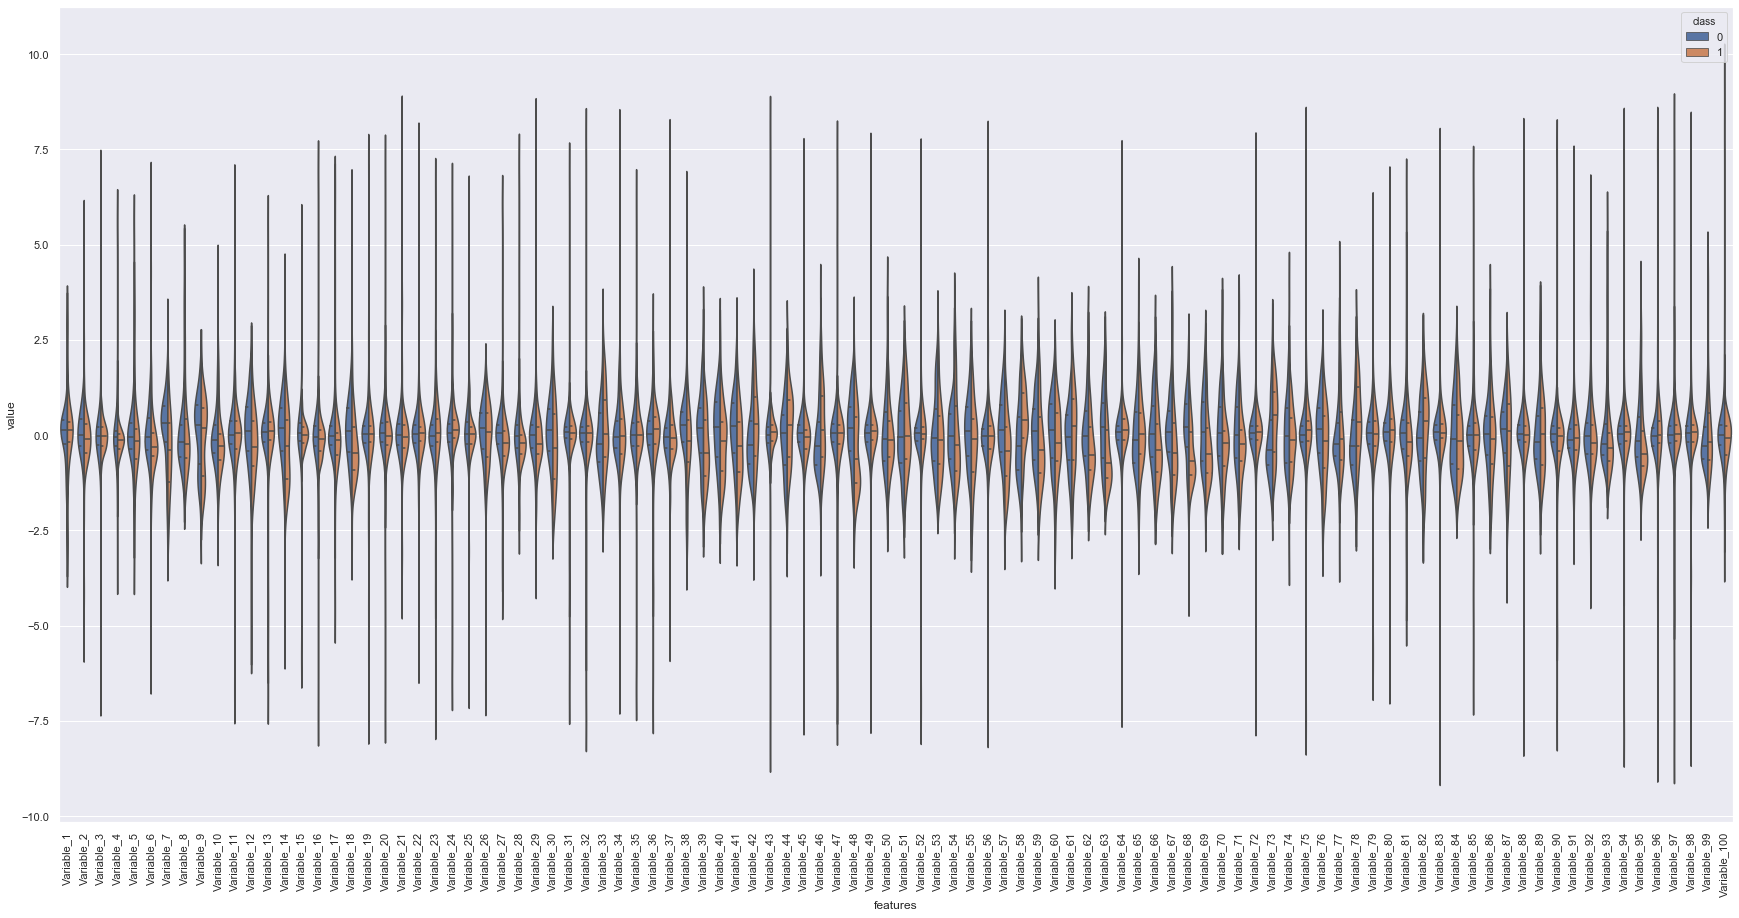

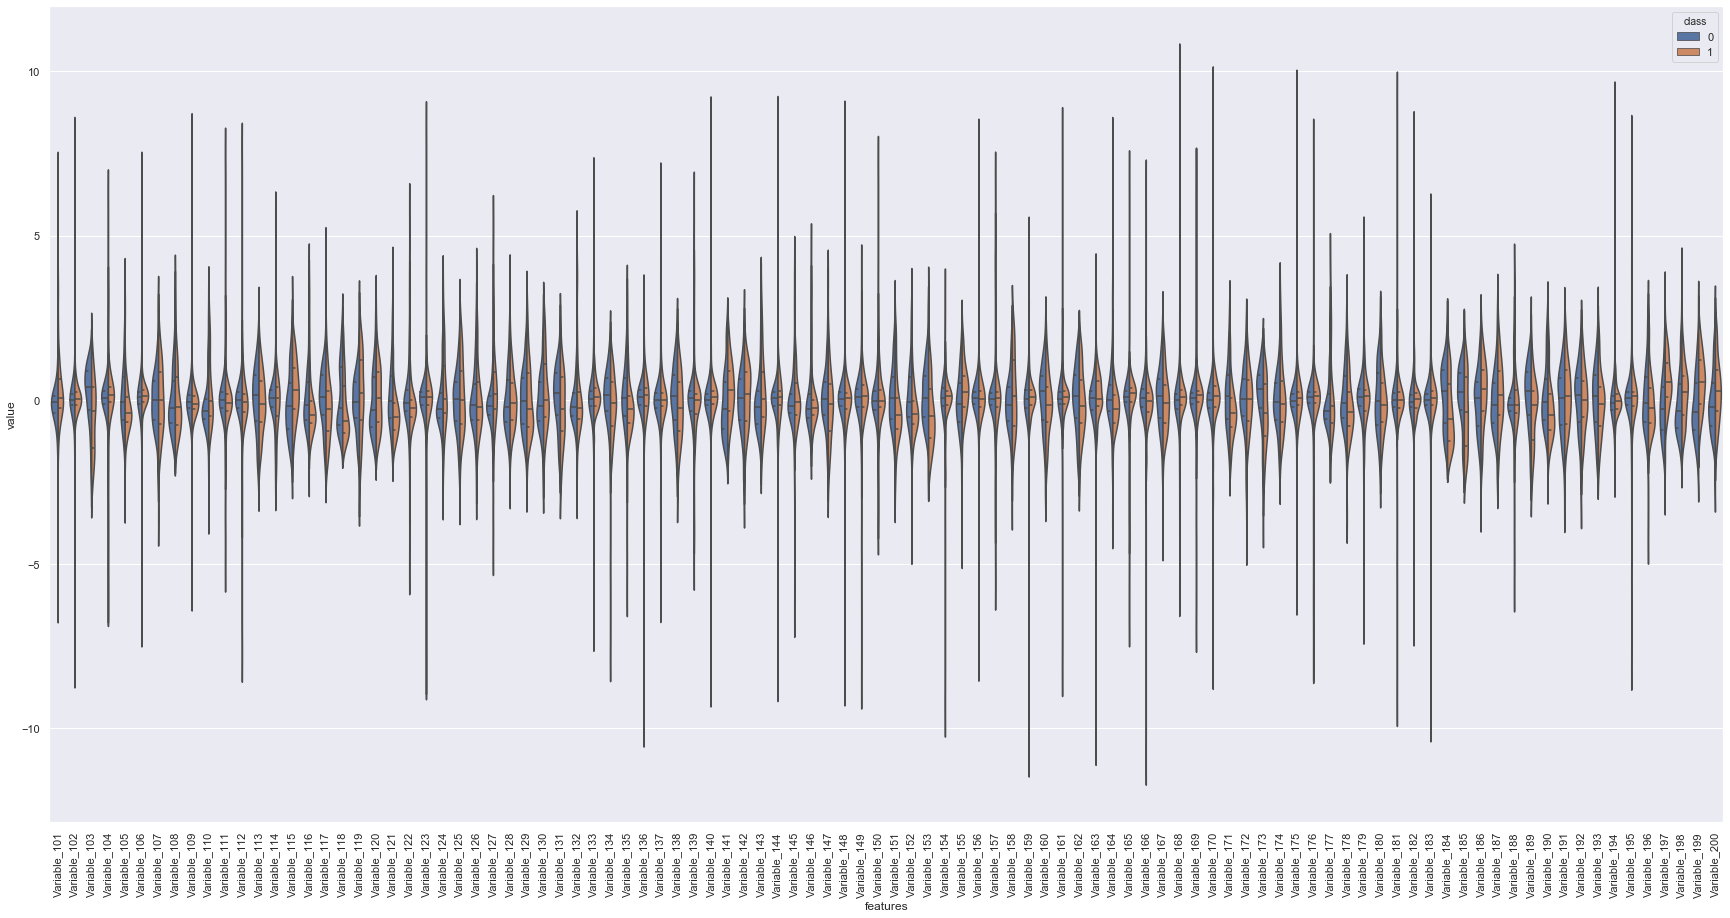

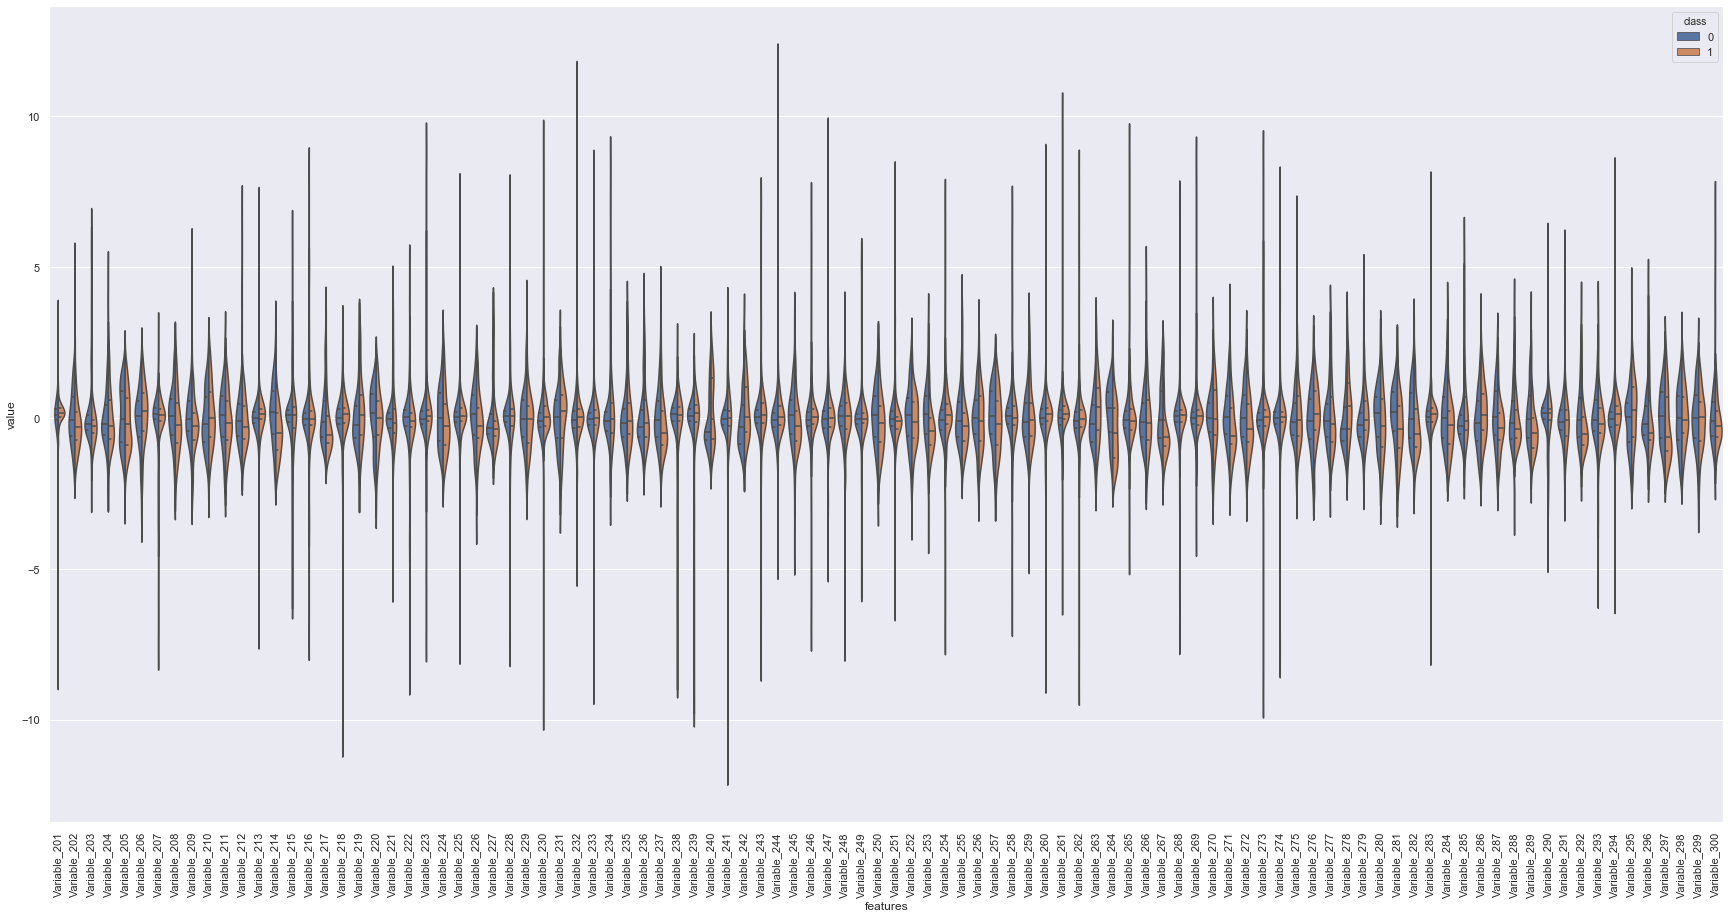

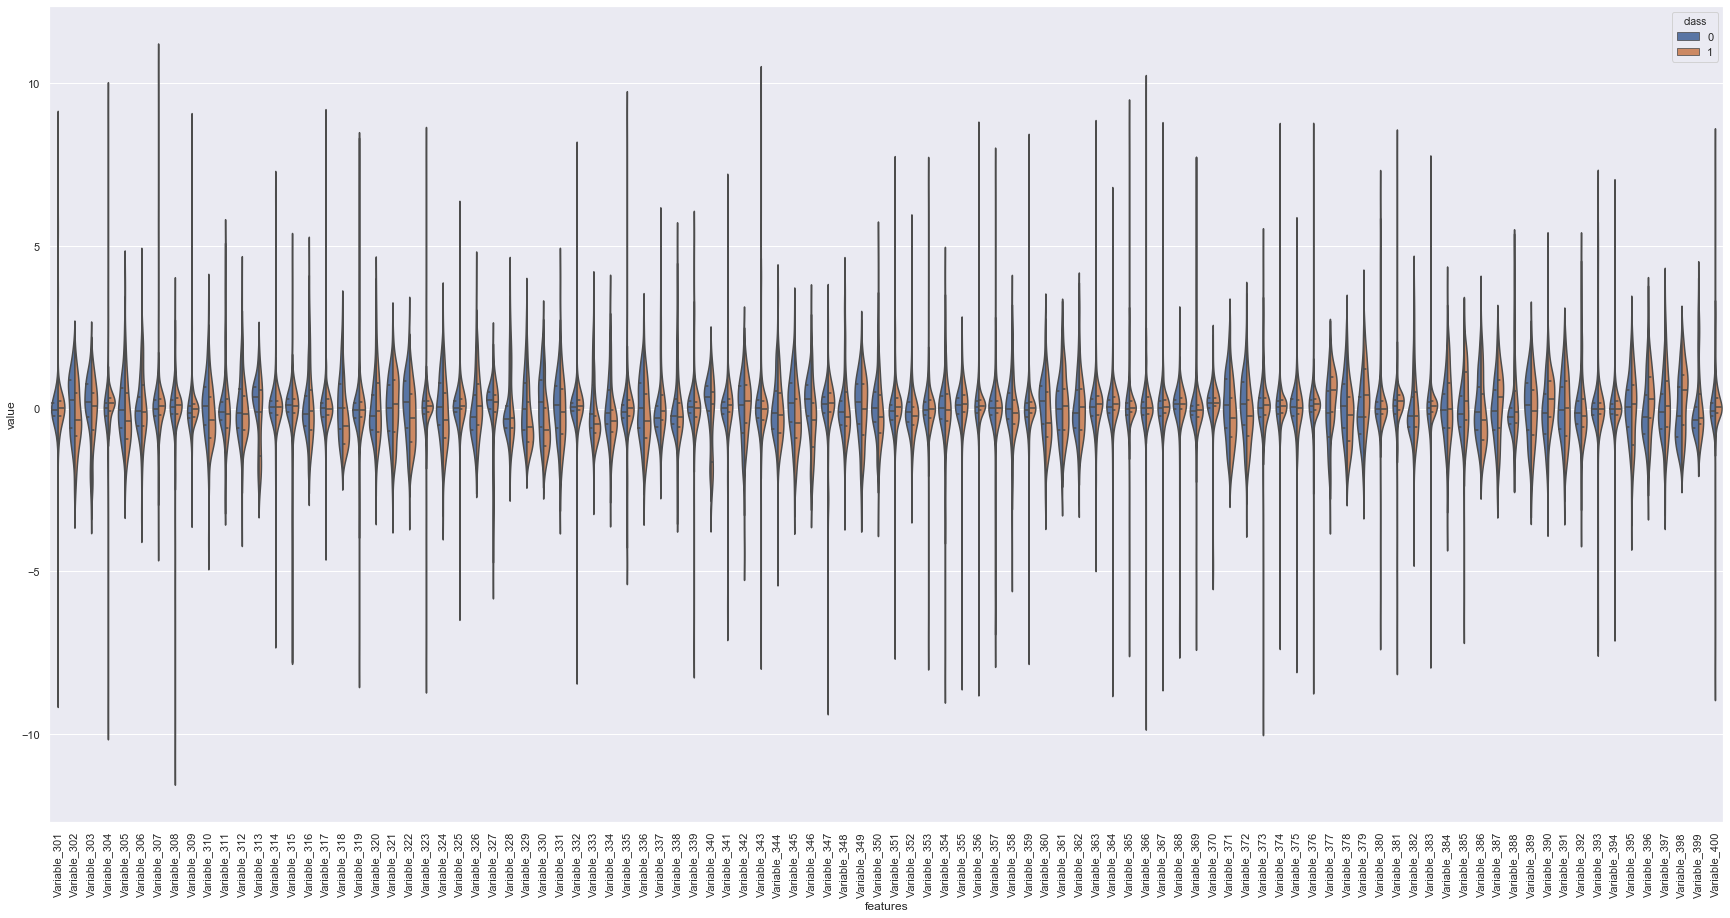

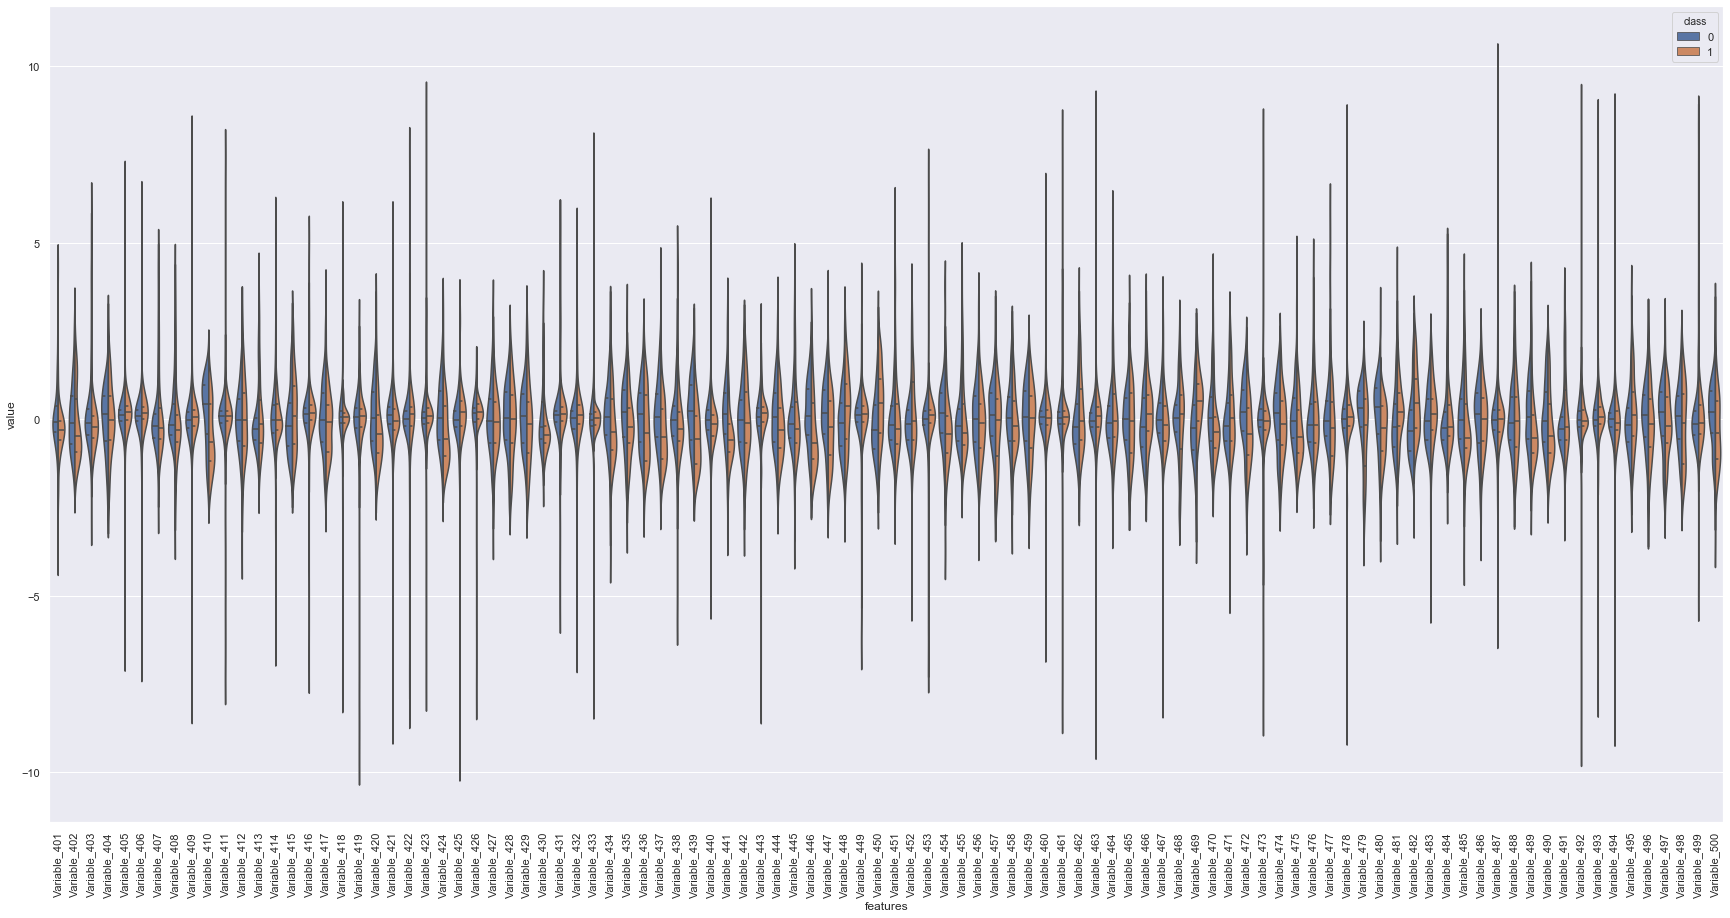

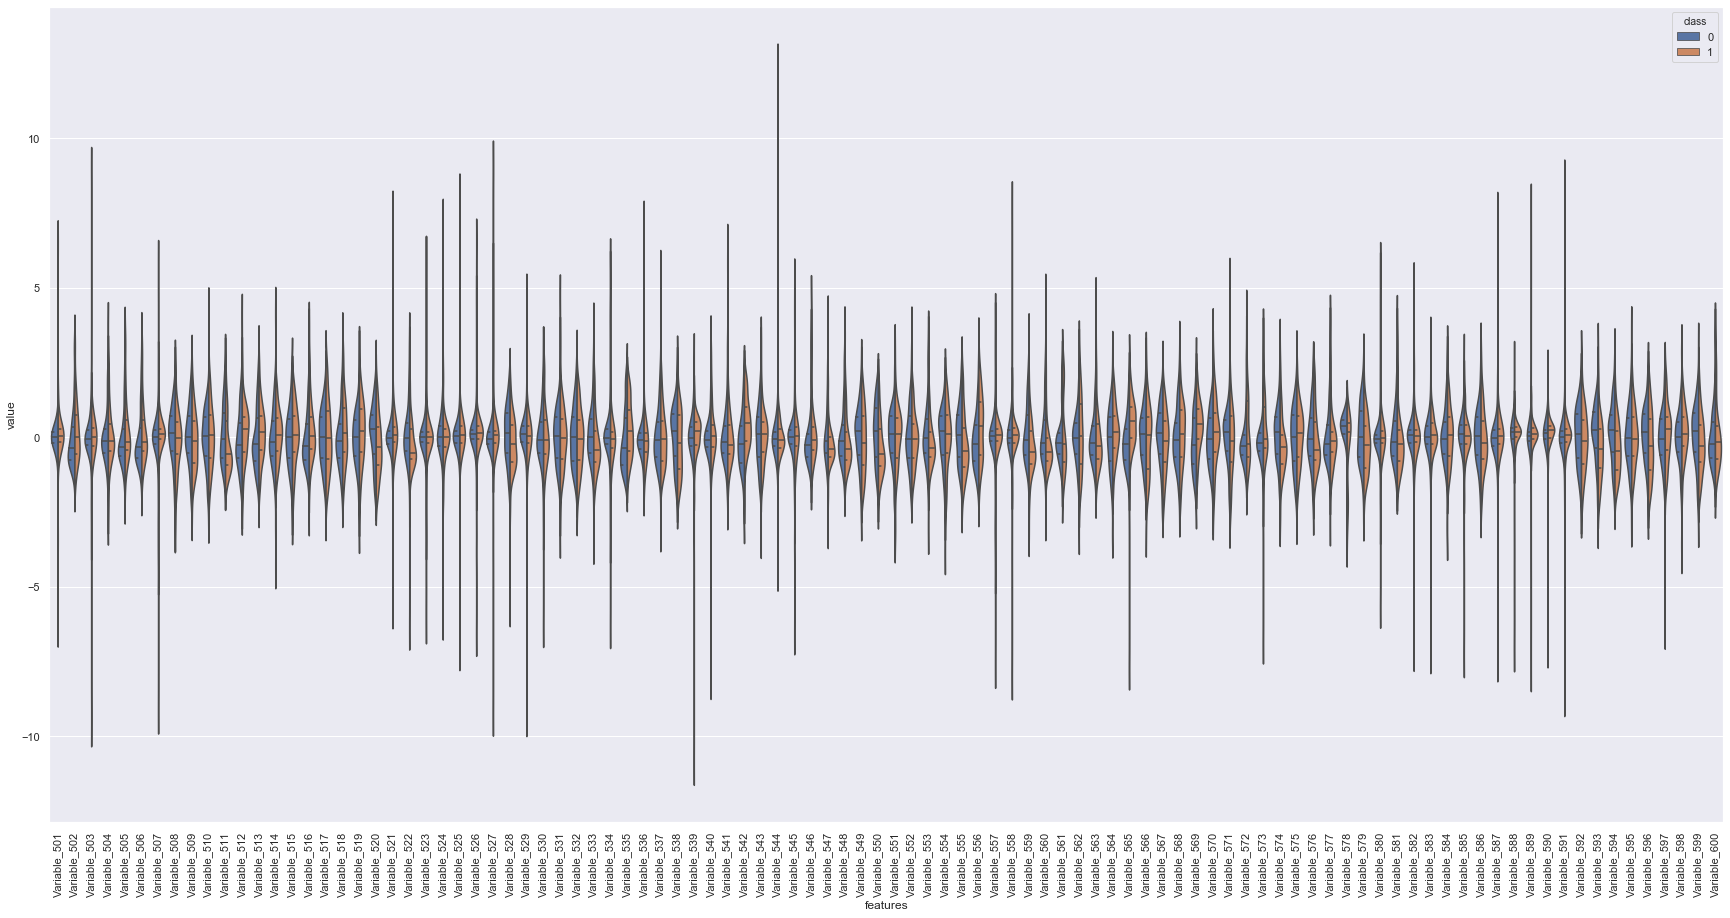

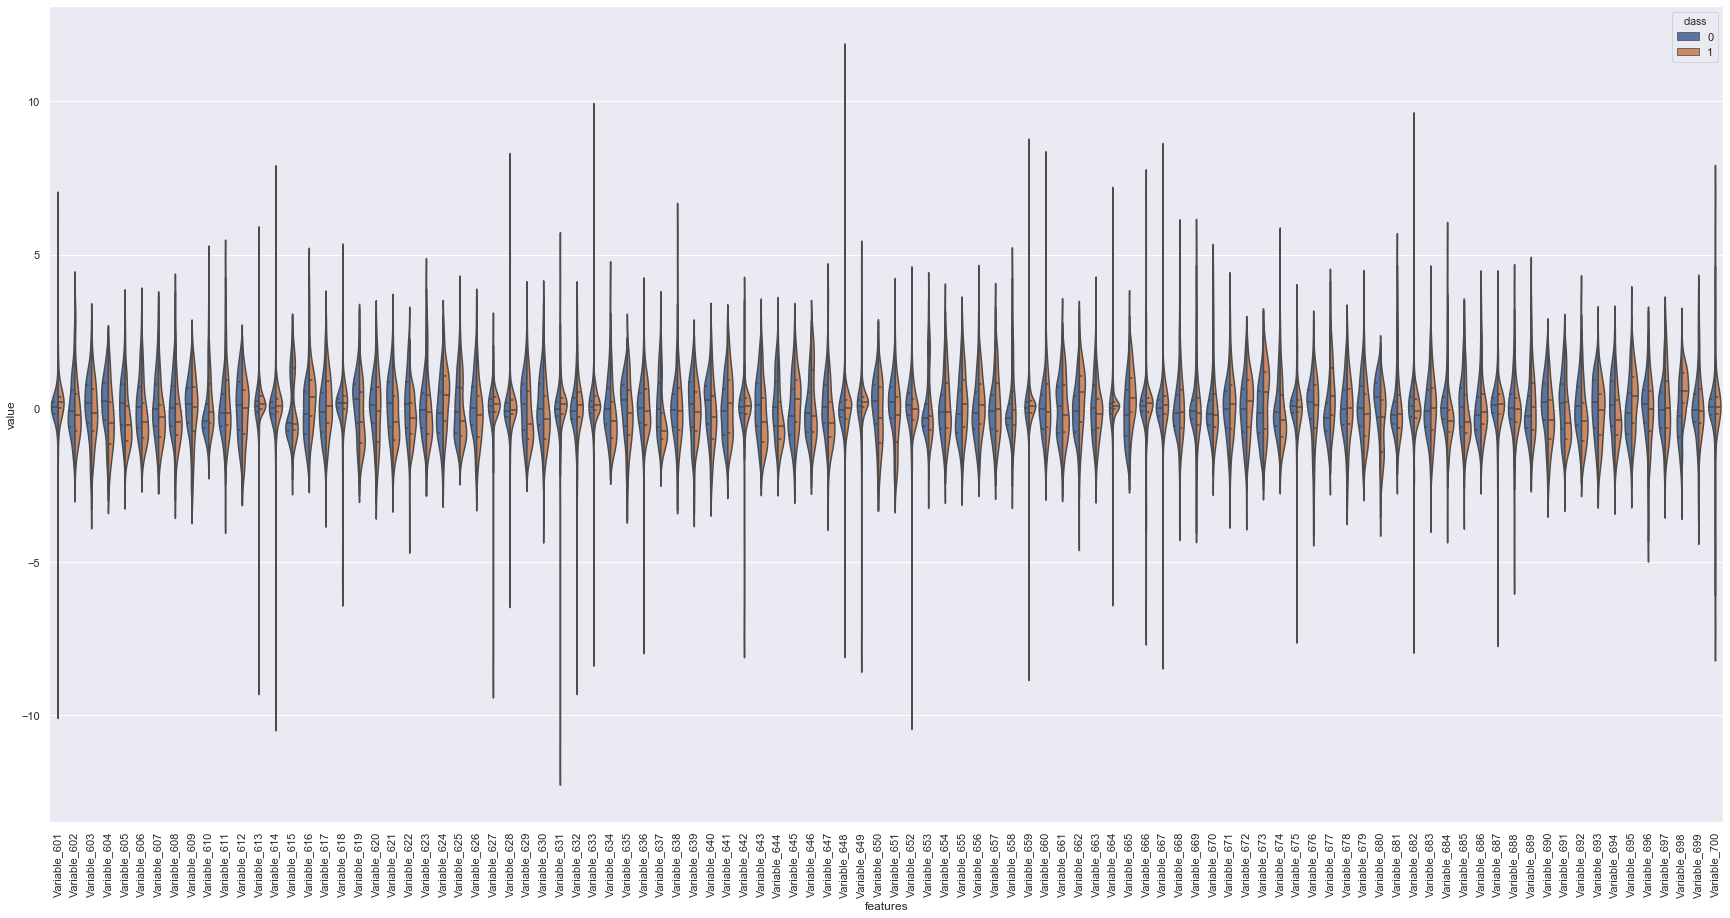

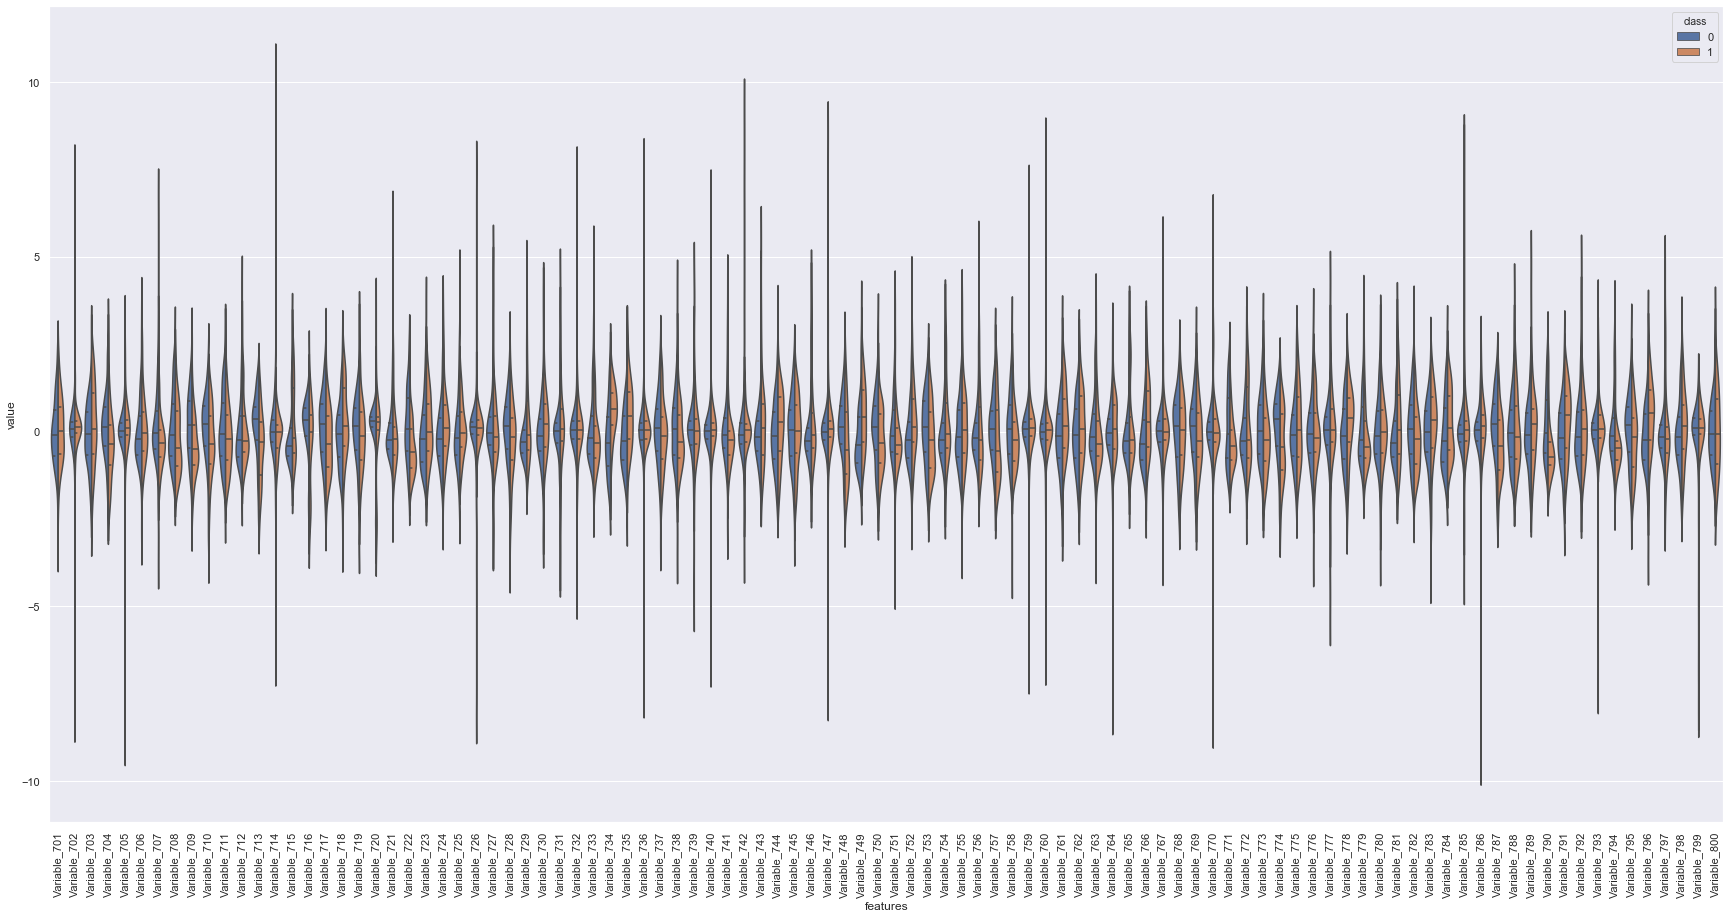

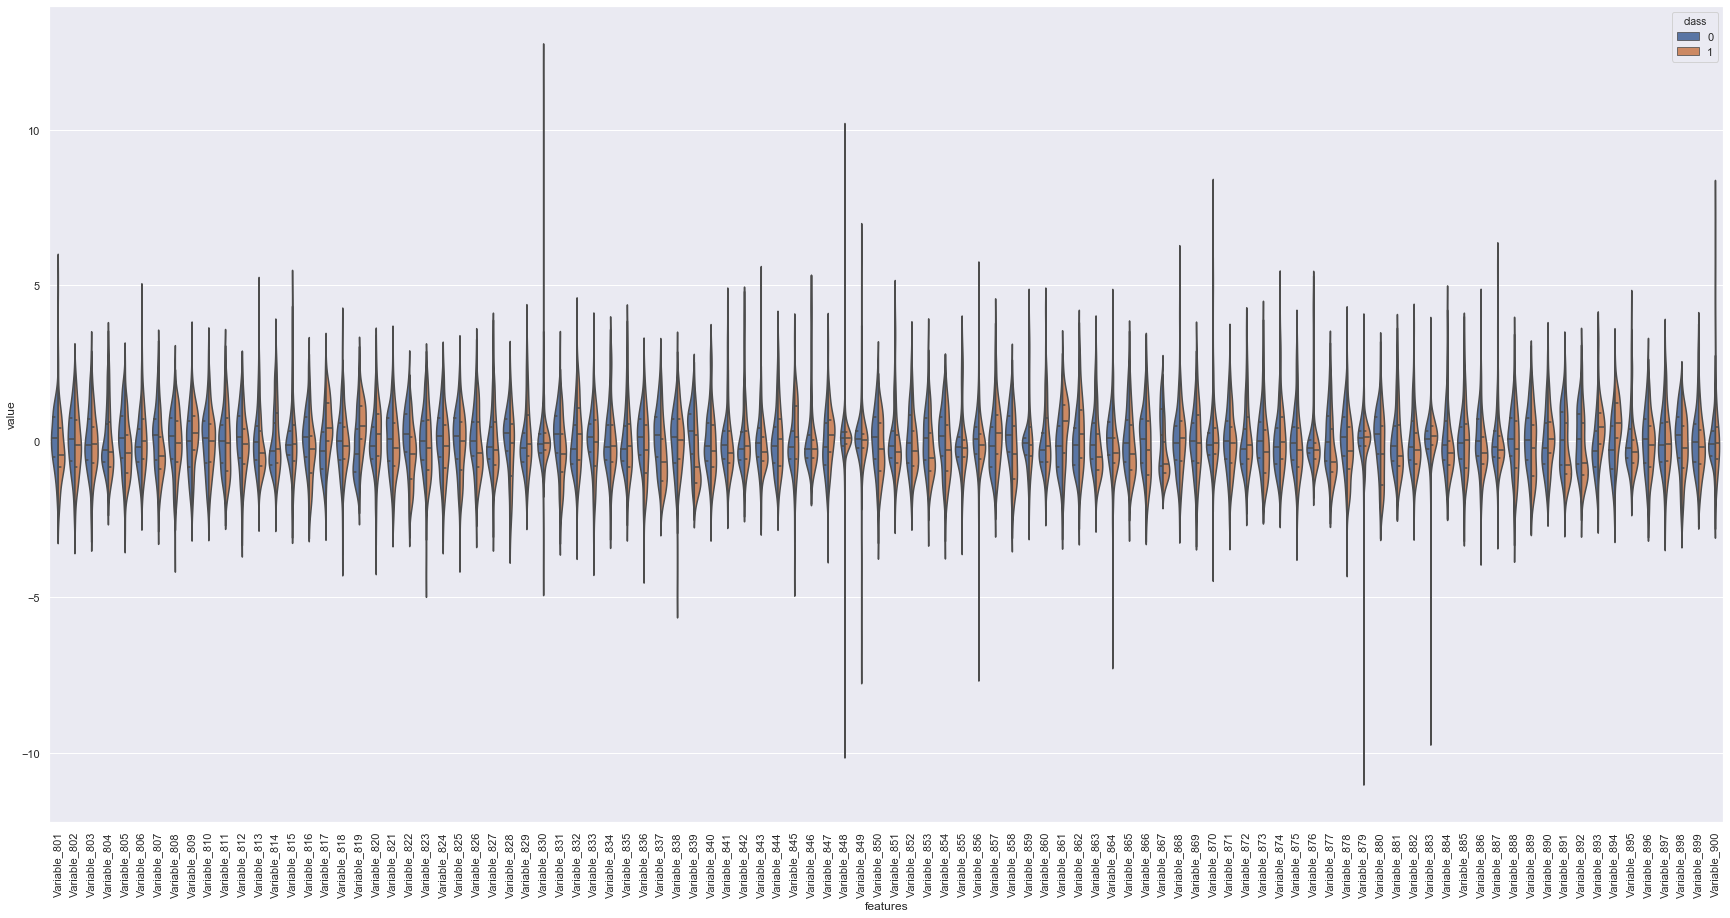

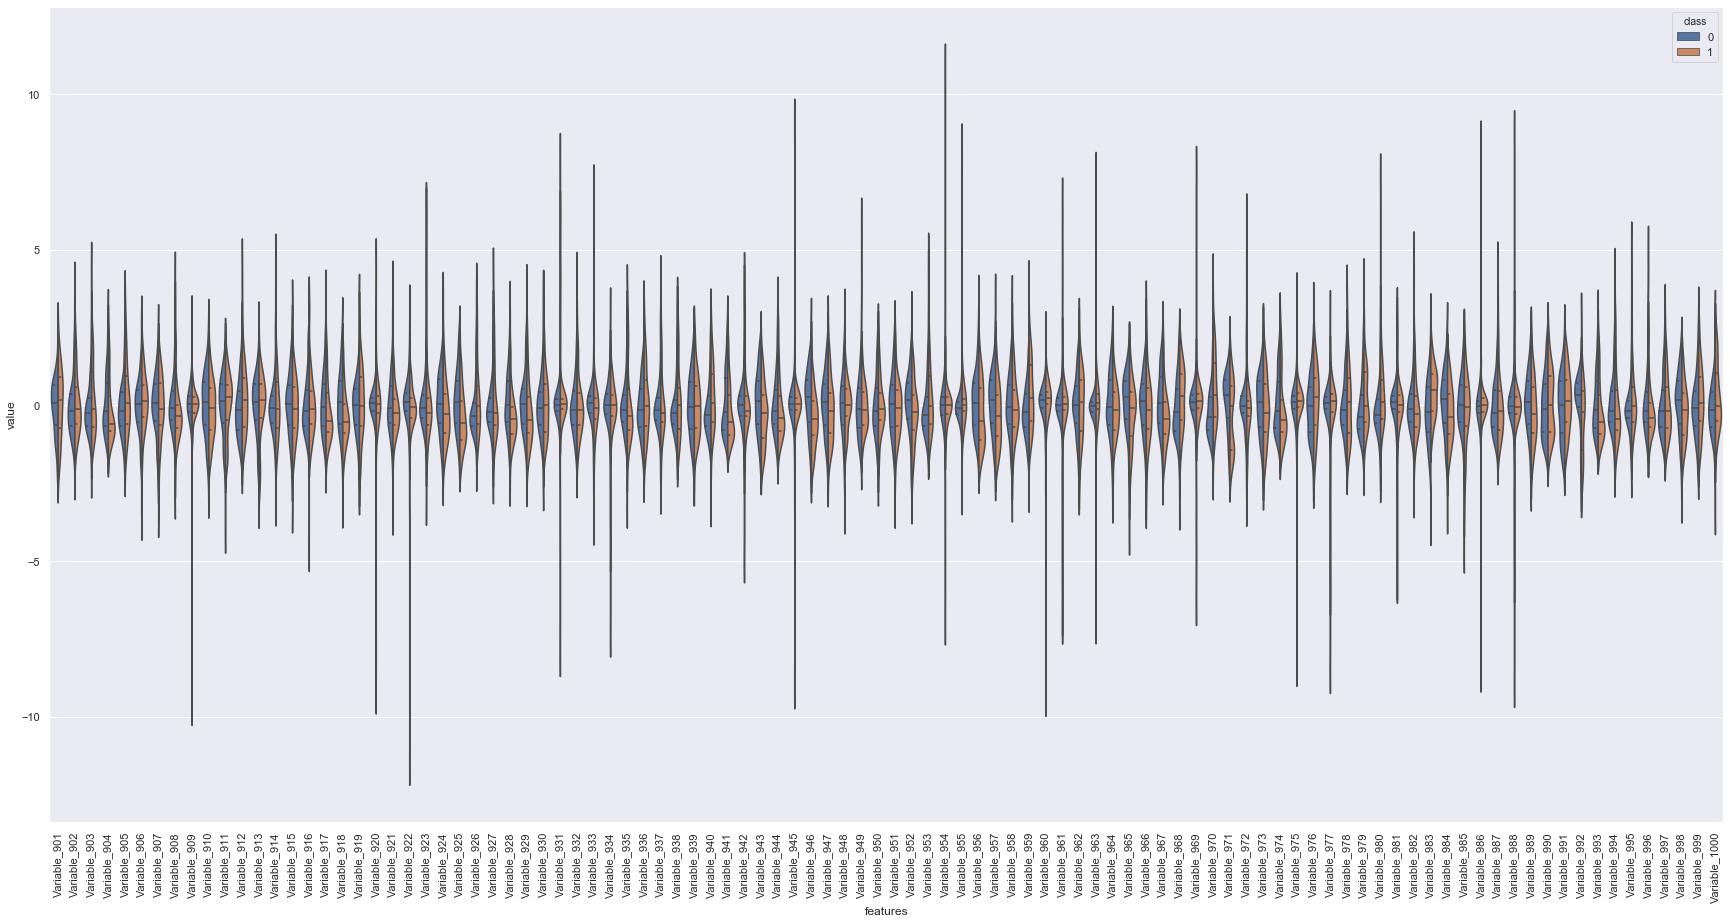

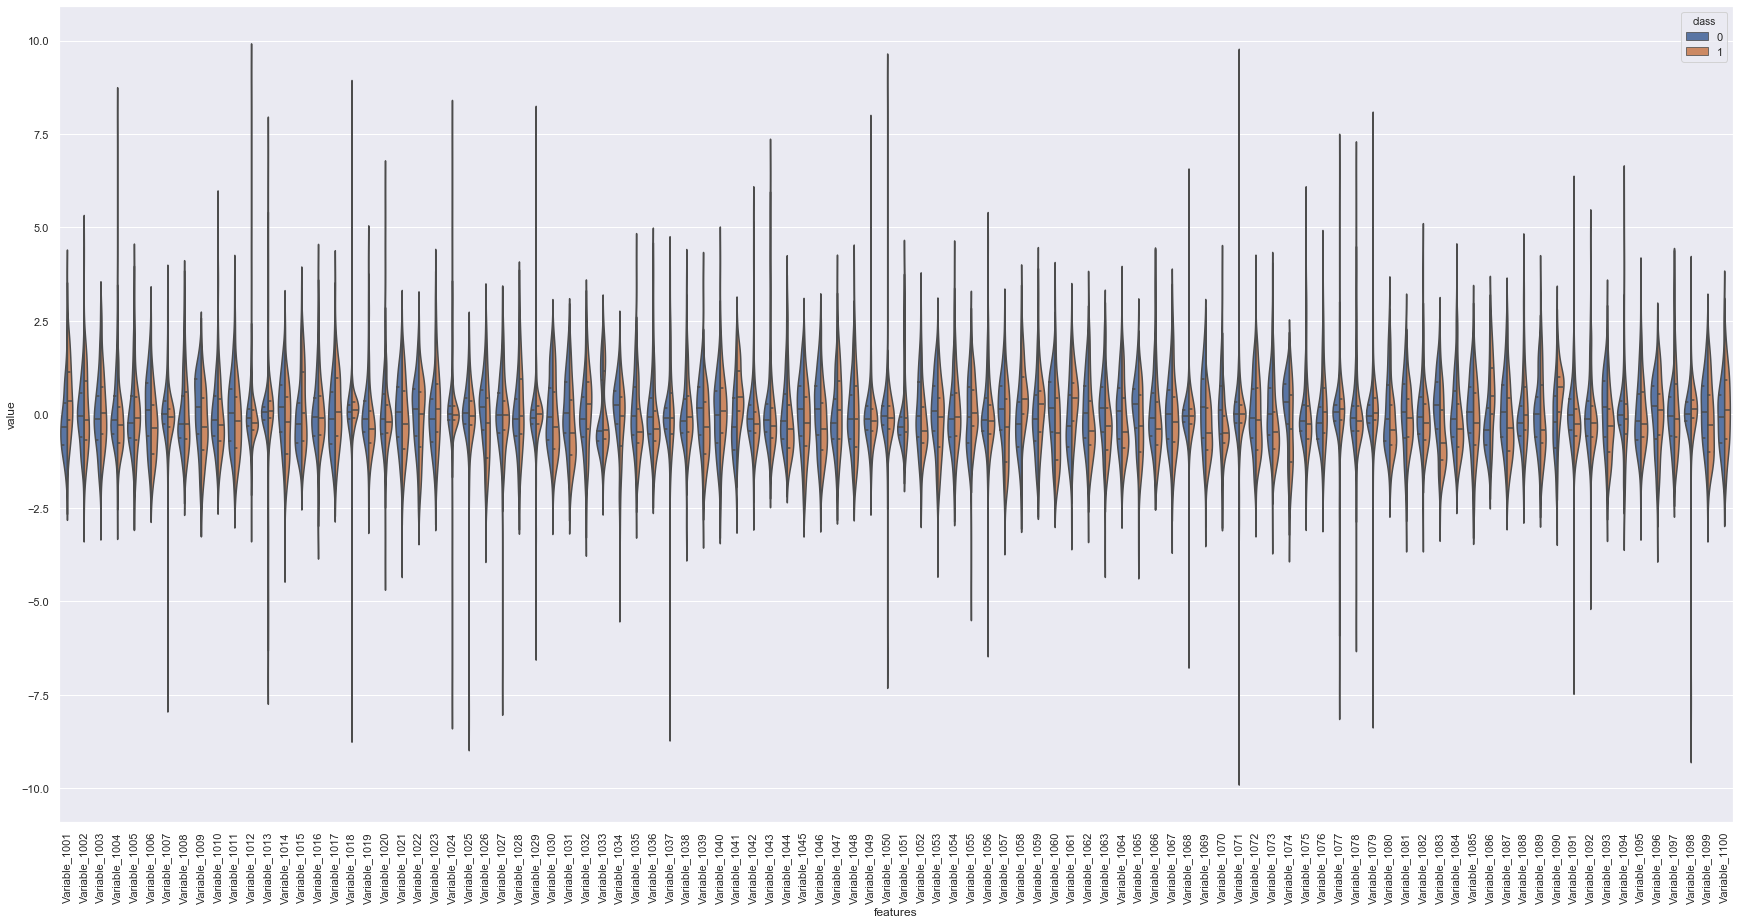

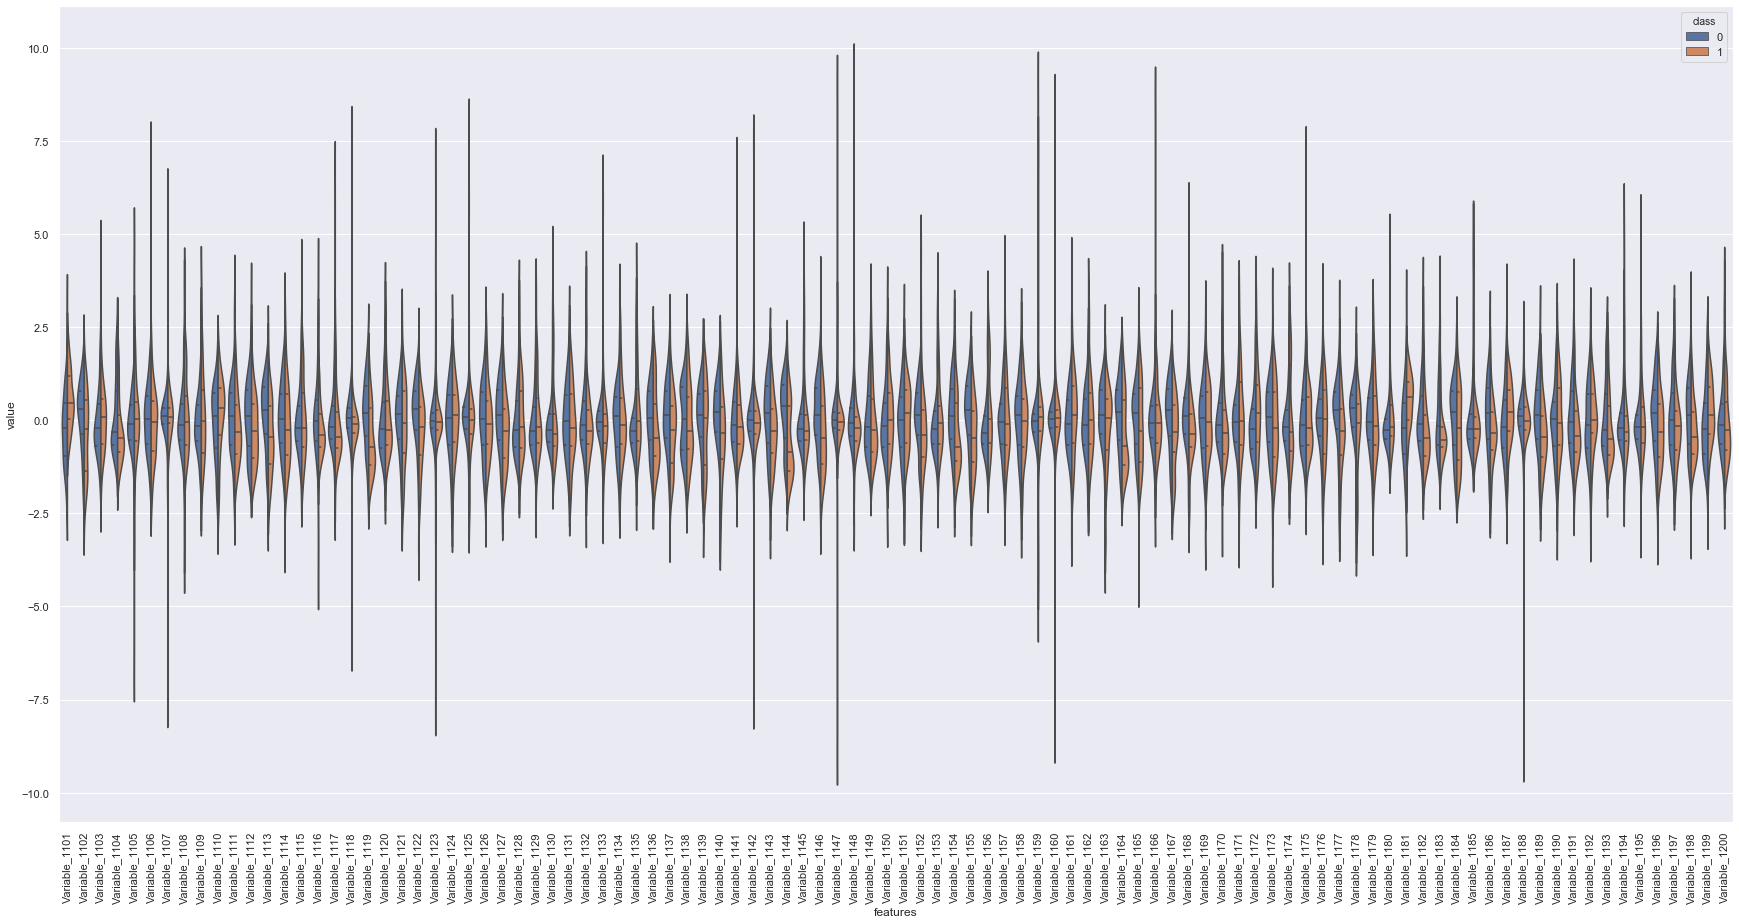

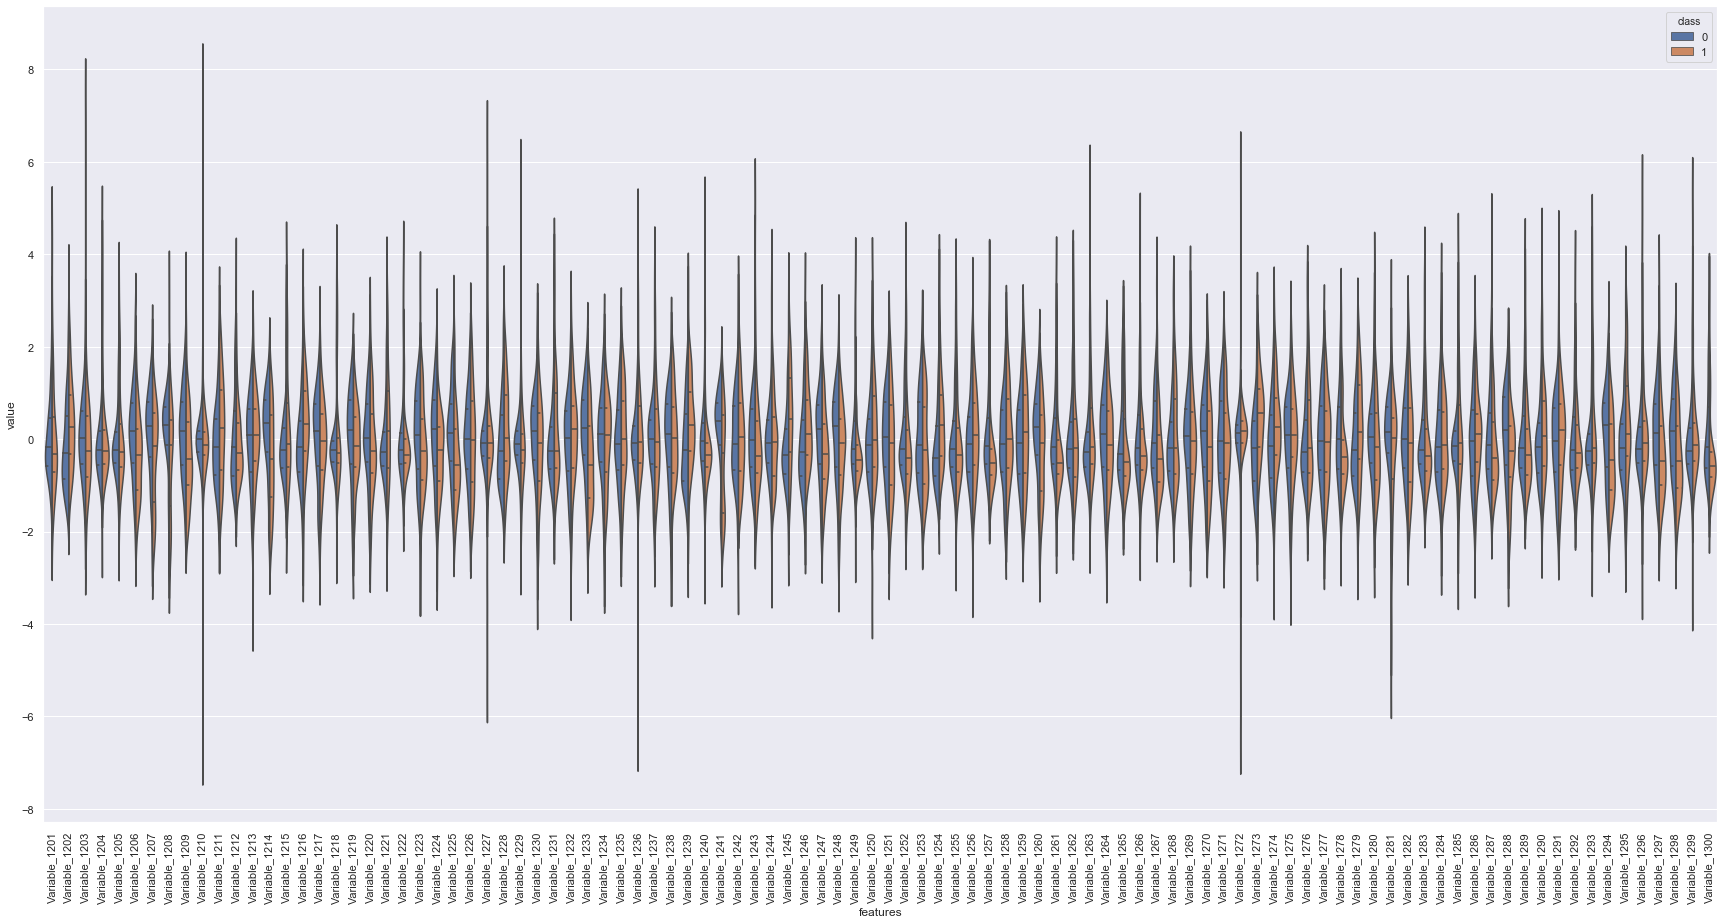

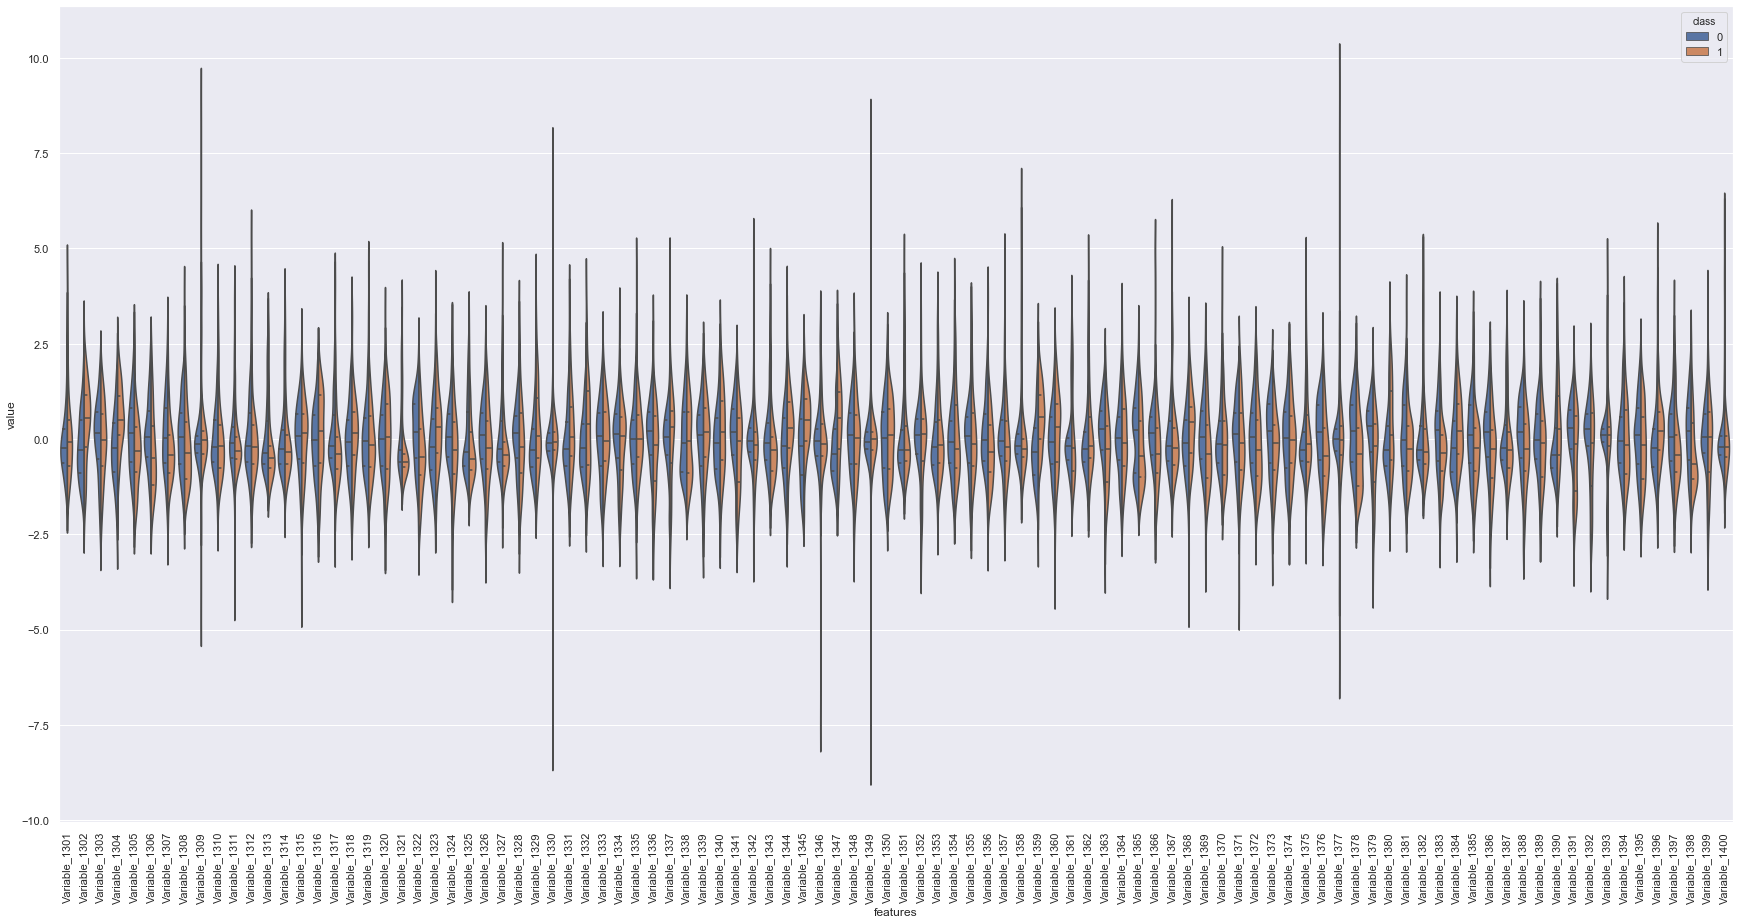

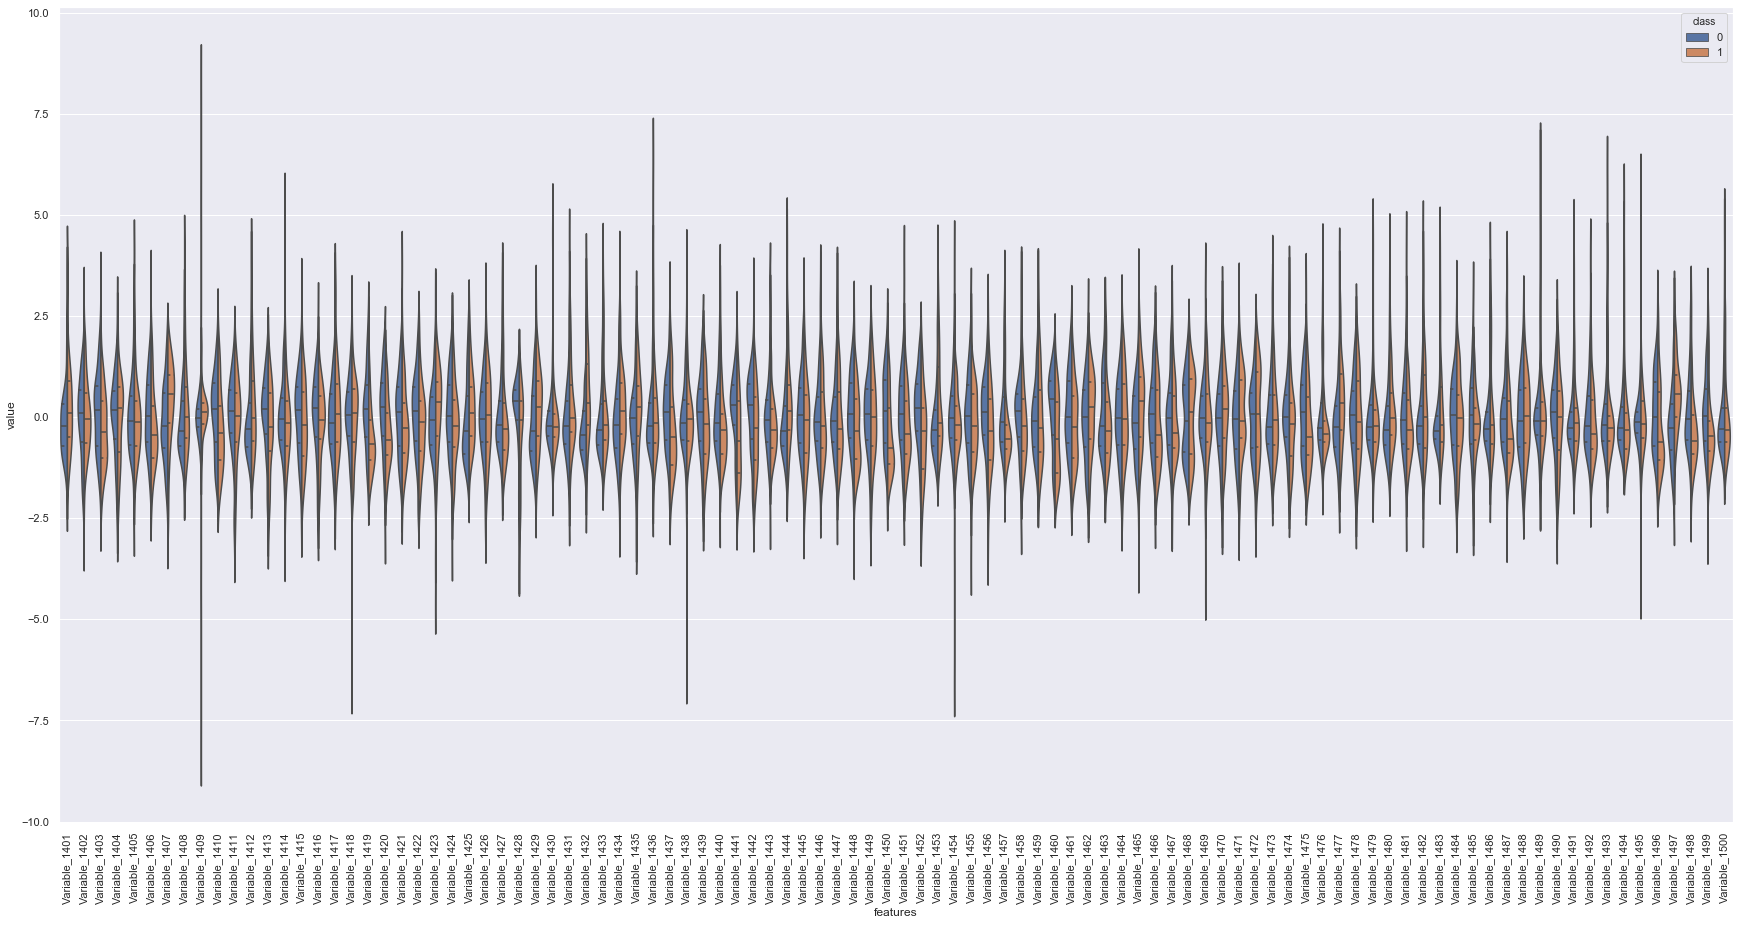

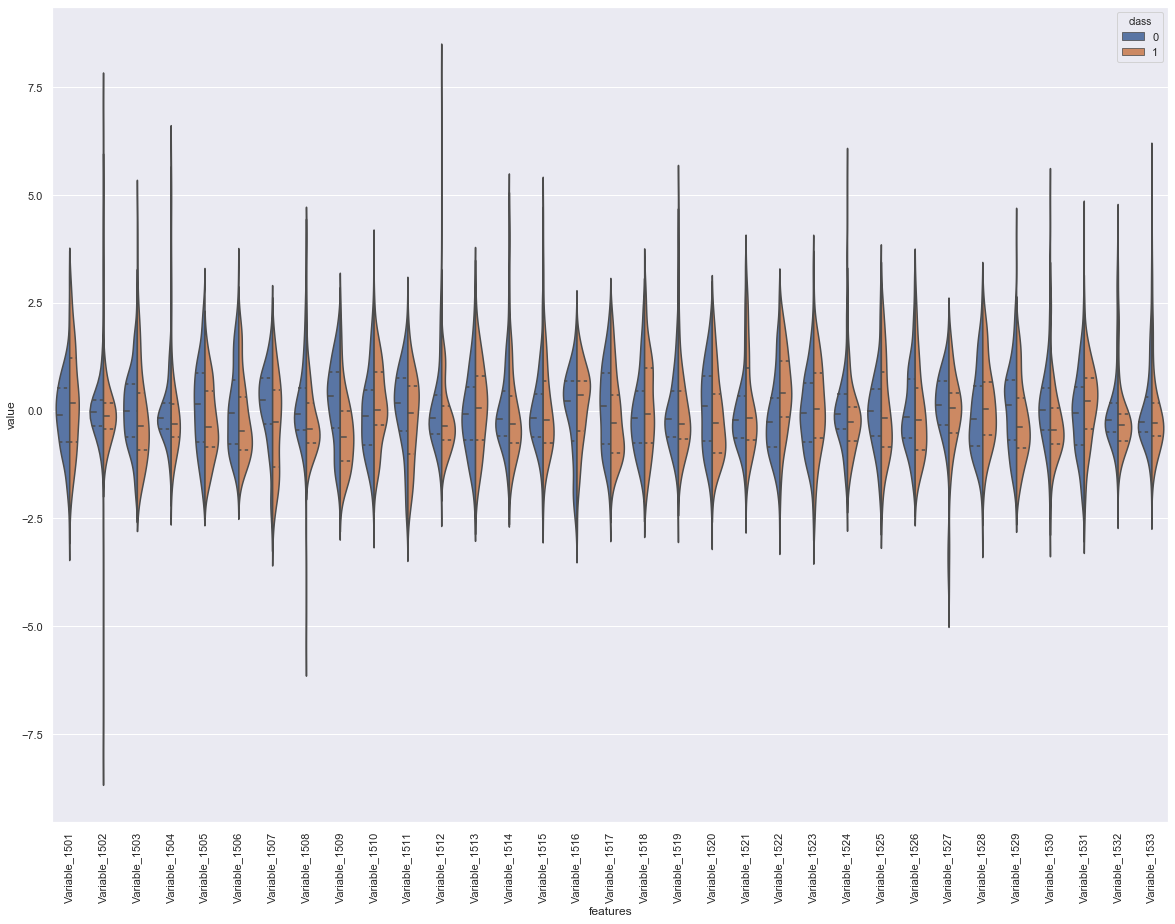

In [9]:
data_dia = Y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization

#Plot the first 1500 features in batches of 100 violin plots
for i in range(15):
    j = i*100
    k = j+100
    data = pd.concat([Y,data_n_2.iloc[:,j:k]],axis=1)
    data = pd.melt(data,id_vars="class",
                        var_name="features",
                        value_name='value')
    plt.figure(figsize=(30,15))
    sns.violinplot(x="features", y="value", hue="class", data=data,split=True, inner="quart")
    plt.xticks(rotation=90)

#Plot the final 33 features
data = pd.concat([Y,data_n_2.iloc[:,1500:1533]],axis=1)
data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,15))
sns.violinplot(x="features", y="value", hue="class", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


#### Results of Violin plot analysis

I've manually walked through each of the 1553 features, as there are only a handful that demonstrate good candidates for classification. I've extracted candidate features that demonstrate the distinctive lopsided distributions between out 0 and 1 "class" labels. The features that I've extracted as candidates for feature selection are listed in the "selected_columns" variable in the code cell below.

For clarity I've visualised the selected features together to enable the reader to see the lopsided distributions.

These features are our candidates for use in Section 4, but before we move further we also need to examine their distribution, "class" label separation and inter feature and "class" label correlations.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 <a list of 37 Text xticklabel objects>)

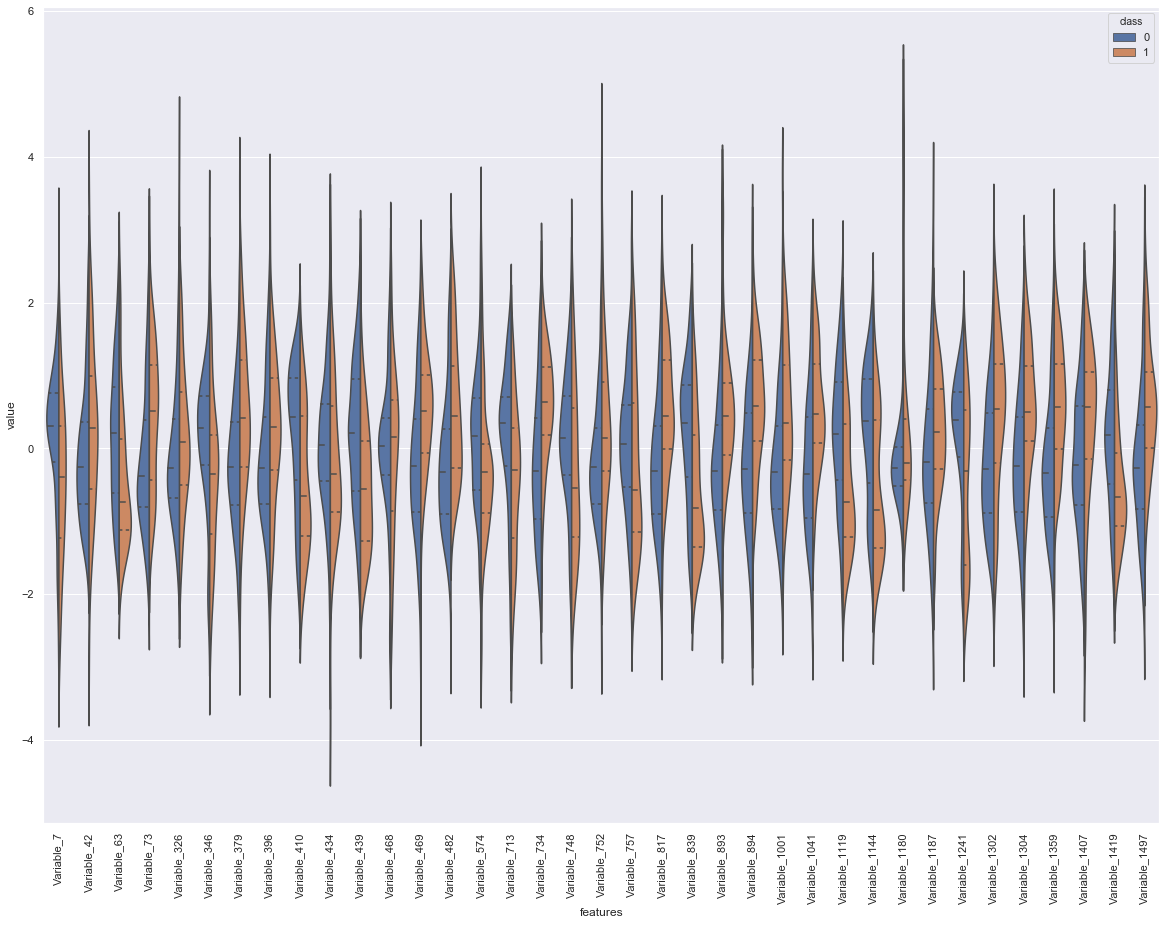

In [10]:
selected_columns = x[[  "Variable_7", "Variable_42", "Variable_63",  
                          "Variable_73", "Variable_326", "Variable_346",
                          "Variable_379", "Variable_396", "Variable_410",  
                          "Variable_434", "Variable_439", "Variable_468",
                          "Variable_469", "Variable_482", "Variable_574",  
                          "Variable_713", "Variable_734", "Variable_748",
                          "Variable_752", "Variable_757", "Variable_574",  
                          "Variable_817", "Variable_839", "Variable_893", "Variable_894",
                          "Variable_1001", "Variable_1041", "Variable_1119", "Variable_1144",
                          "Variable_1180", "Variable_1187", "Variable_1241", 
                          "Variable_1302", "Variable_1304", "Variable_1359", 
                          "Variable_1407", "Variable_1419", "Variable_1497" ]]

data = selected_columns.copy()

data_n_2 = (data - data.mean()) / (data.std())              # standardization

data = pd.concat([Y,data_n_2.iloc[:,0:38]],axis=1)
data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,15))
sns.violinplot(x="features", y="value", hue="class", data=data,split=True, inner="quart")
plt.xticks(rotation=90)



### Swarm Plot

I'll now review the variance of the candidate features I've extracted from the manual violin plote review in the prrevious section. I'll visualise the features via Swarm Plots. The swarm plot really shines when used to display continuous data juxtaposed with a categorical metric. With strong variance, and separation, I'd expect to see the feature exhibiting a good separation between the 0 and 1 data coloured points.

You can see below that strong variance and good separation is not available in any of the features. The best feature is Variable_1460, but even this feature does not offer the clarity of separation that would enable a strong prediction. i.e. all the candidate features are all noisy to a greater or lesser extent.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 <a list of 37 Text xticklabel objects>)

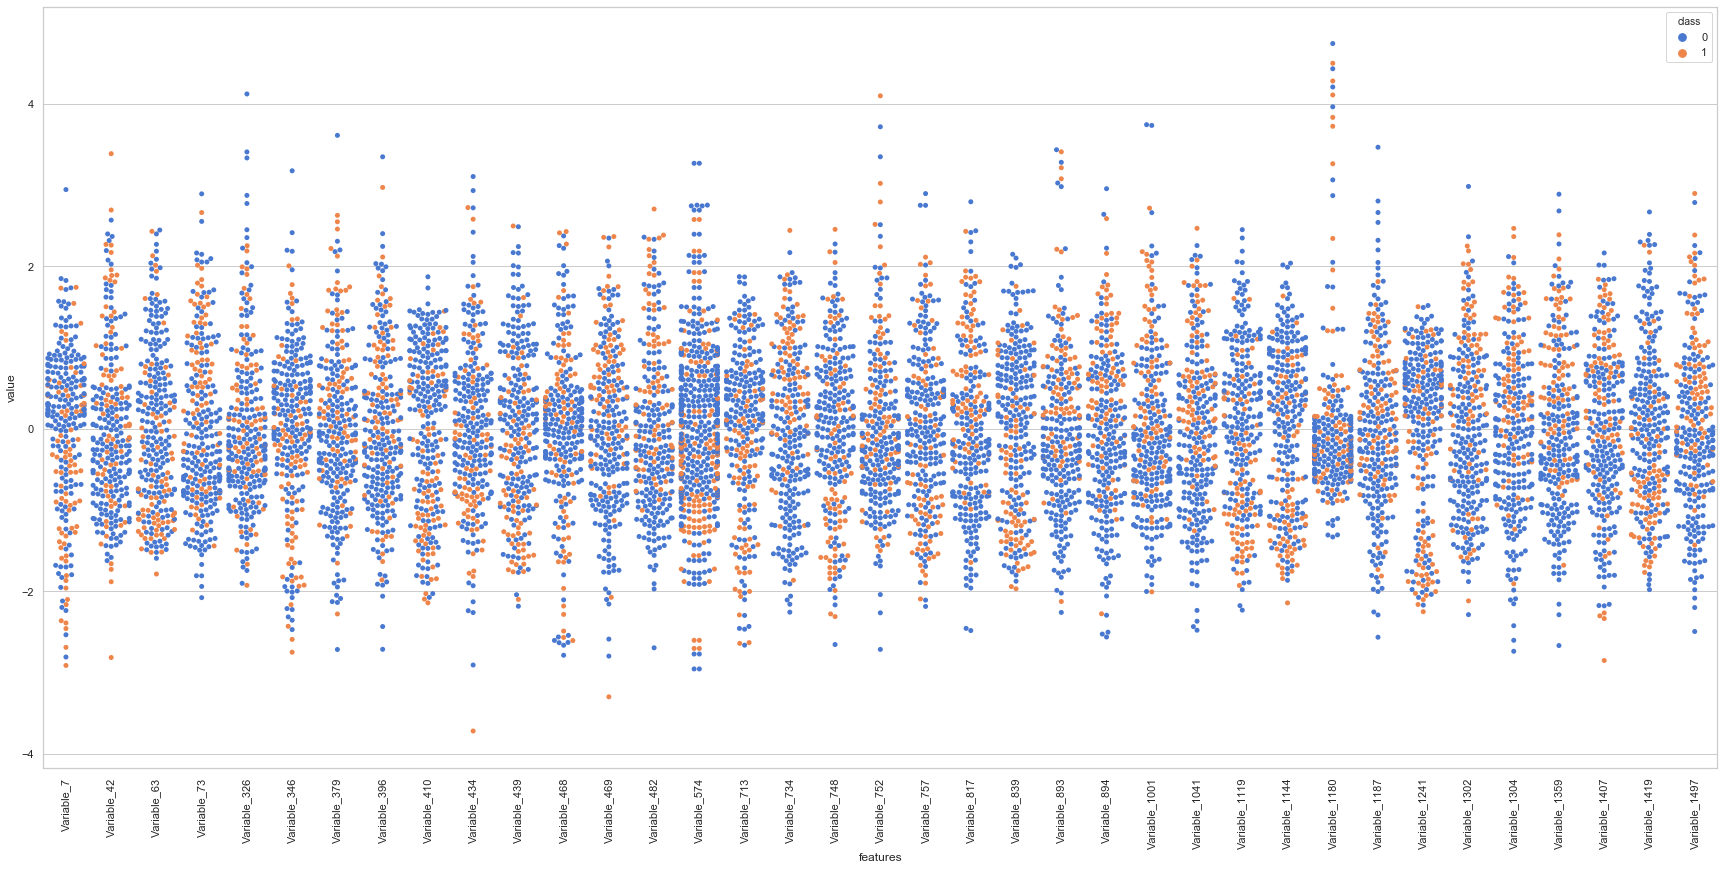

In [11]:
import time

sns.set(style="whitegrid", palette="muted")
data_dia = Y

selected_columns = x[[  "Variable_7", "Variable_42", "Variable_63",  
                          "Variable_73", "Variable_326", "Variable_346",
                          "Variable_379", "Variable_396", "Variable_410",  
                          "Variable_434", "Variable_439", "Variable_468",
                          "Variable_469", "Variable_482", "Variable_574",  
                          "Variable_713", "Variable_734", "Variable_748",
                          "Variable_752", "Variable_757", "Variable_574",  
                          "Variable_817", "Variable_839", "Variable_893", "Variable_894",
                          "Variable_1001", "Variable_1041", "Variable_1119", "Variable_1144",
                          "Variable_1180", "Variable_1187", "Variable_1241", 
                          "Variable_1302", "Variable_1304", "Variable_1359", 
                          "Variable_1407", "Variable_1419", "Variable_1497" ]]

data = selected_columns.copy()

data_n_2 = (data - data.mean()) / (data.std())              # standardization

data = pd.concat([Y,data_n_2.iloc[:,0:38]],axis=1)

data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(30,14))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="class", data=data)

plt.xticks(rotation=90)



### Lets examine the corrrelations between the candidate features

We can see that no feature exceeds 0.4(-0.4) against the class label. There are several features that have correlations of 0.9 and therefore they are candidates for removal as they contain a duplication of the underlying information and are therefore an excess dimension.

I will discuss removal and find tuning of these candidate feature extractions in section 4.


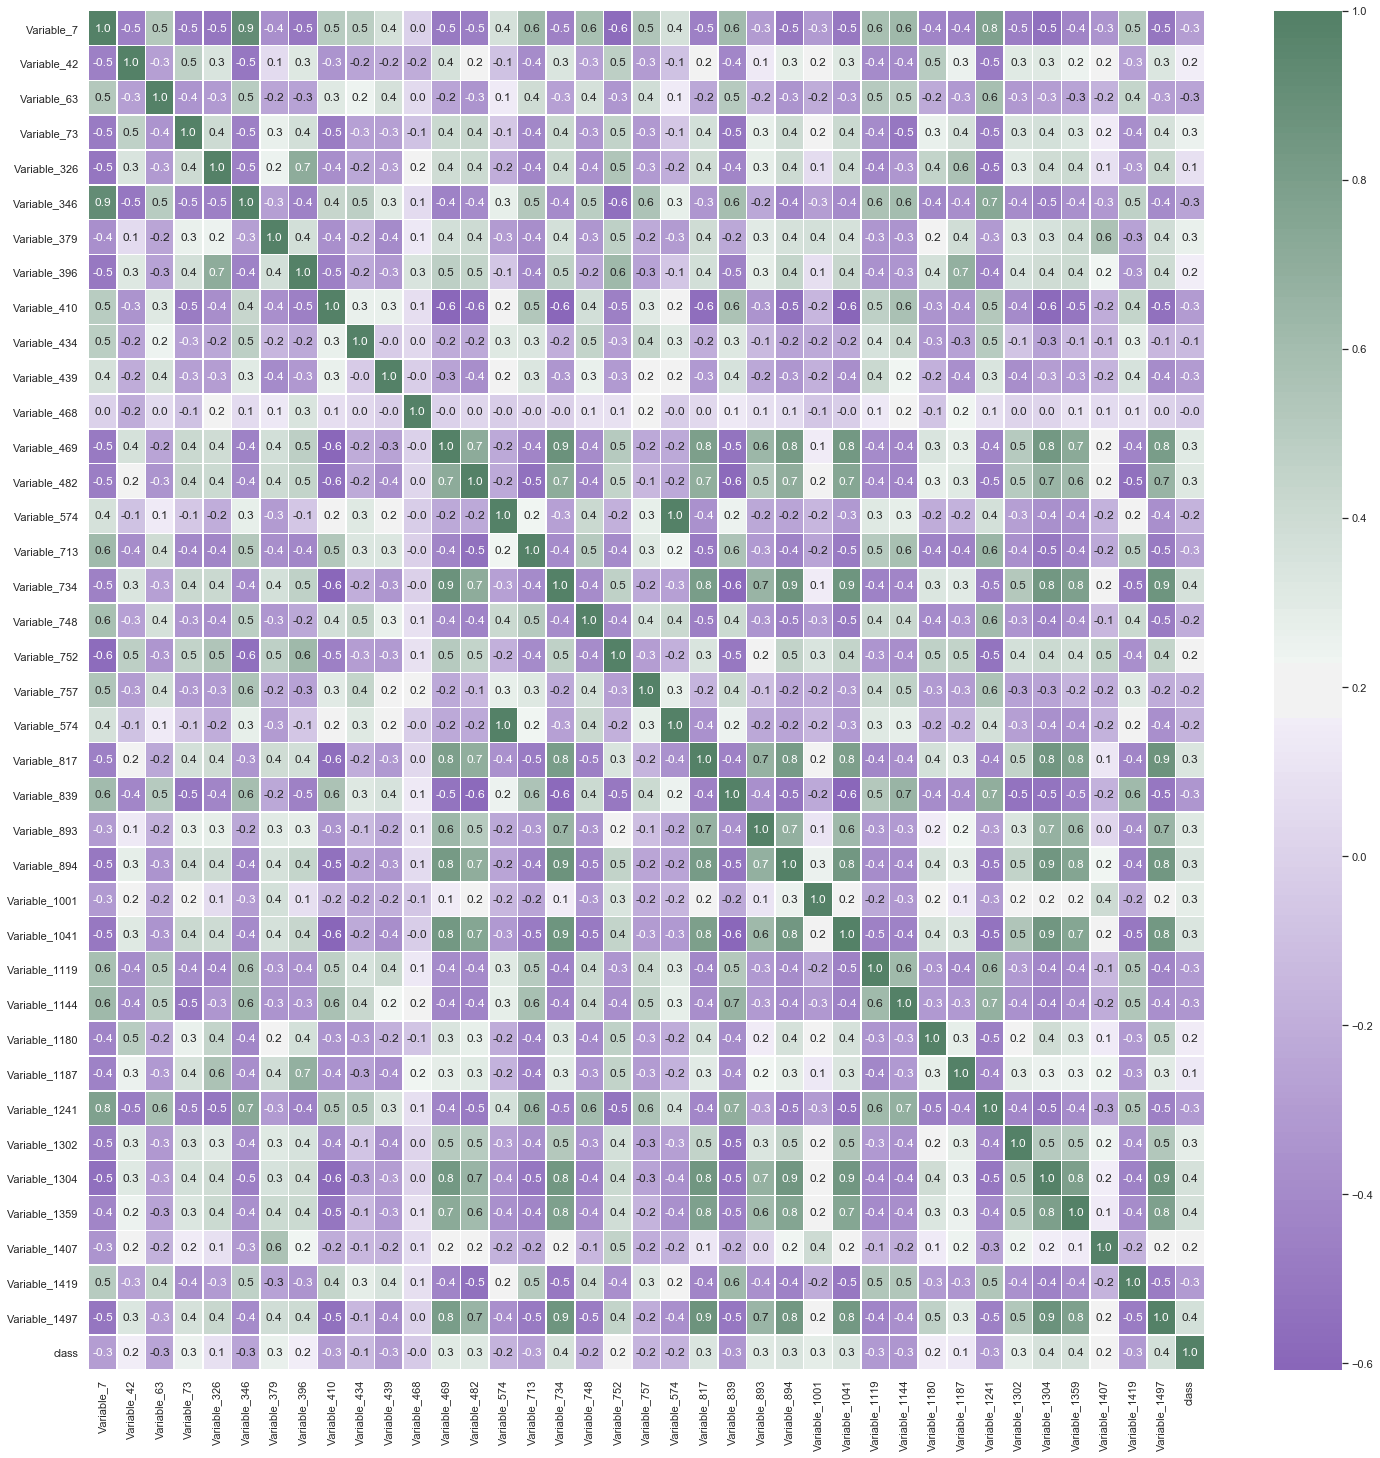

In [12]:
##################################################################################################
###### Correlation Analysis of Feature Selection #################################################
##################################################################################################
df_heat = pd.concat([data_n_2, Y],axis=1)

sns.set()
colorMap = sns.diverging_palette(145, 280, s=50, l=50, n=200)
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_heat.corr(), cmap = colorMap[::-1], annot=True, linewidths=.5, fmt= '.1f', ax=ax) 

# 1) Explore the data: Summary

### Question: 

Provide summary statistics and at least three visualizations for the variable columns (one at a time, or in combination). In a brief paragraph, summarize the distributions for variable values and explain your choices for visualization. Are there any anomalous distributions for variables? How did you determine this?

### Answer:

I've explored the variance distribution (distribution plot, multidimensional scaing and swarm plots), probability distributions (violin plots) and inter feature correlations (correlation analytics summary). In addition I've also explored candidate feature extractions and compiled a candidate feature list for reference in Question 4.

I think its clear, in the visualisations and comments in section 1, that this is a challenging dataset. We have the worst case scenario interms of predictive analytics: a high dimension, low observation, very low variance, highly correlated feature set with a weakly correlated class label (more details of which are in section 3.a). The violin plots addtionally highlight that there are few features that exhibit a strong binary classification distribution. And further more, the swarm plots demonstrate that even the strong candidates for feature extraction demonstrate moderately weak separation between their 0 and 1 labelled data points. It is highly likely that we'll be able to drop a significant number of features and that the predictive model will be required to be high bias.


## 2) Present a Principal Components Analysis (PCA) plot for the samples. 

### Question:
Present a Principal Components Analysis (PCA) plot for the samples. . It should contain a scatterplot of the sample points with the axes PC1 vs. PC2. Indicate on the plot which samples have class = 1 and which have class = 0.

### Answer:
The PCA plot, as specified in question 2, can be seen below. The analysis suggests that the dataset can be reduced to 120 components at 90% variance ratio. This can be seen in the subsquent plot of the cumulative explained variance against the number of PCA components.

I shall use PCA to improve the generalisation in the answers to question 4

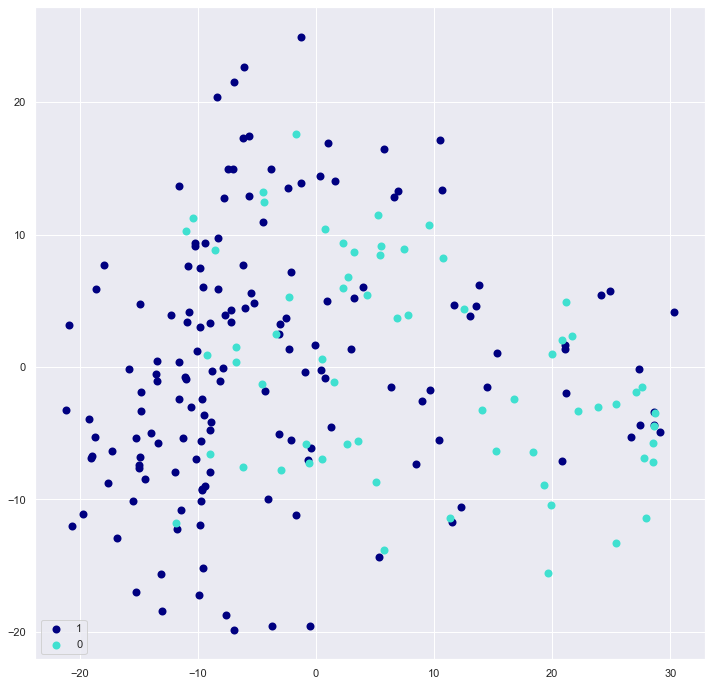

Principle Components: [[ 2.93101557e-03 -1.15162479e-02  2.20556697e-03 ...  1.93343586e-02
  -1.06205375e-02  6.08004434e-03]
 [-1.59199607e-02 -3.41333754e-02  5.98666406e-03 ...  4.28163408e-03
  -1.71257857e-02 -1.71658422e-02]
 [ 2.07282476e-02  2.10291099e-02  1.68369996e-02 ... -3.86409479e-02
   1.74523128e-03 -9.52963816e-03]
 ...
 [ 4.08257597e-02  1.36820174e-02 -1.25522780e-02 ...  1.32228556e-02
   2.06402811e-02 -1.54242875e-02]
 [-1.65594886e-02 -4.09099639e-02 -2.62117633e-02 ... -1.98008211e-02
   3.14524021e-02  1.33610508e-05]
 [-9.23254384e-03 -1.08938511e-01  3.03629745e-02 ... -3.88024073e-03
   5.01020184e-03 -9.82605776e-03]]
PCA Ratio: [1.14963944e-01 5.19007485e-02 4.15689620e-02 3.78714534e-02
 3.05627430e-02 2.69499574e-02 2.40583576e-02 2.08762465e-02
 1.88634931e-02 1.78913340e-02 1.67712092e-02 1.40665843e-02
 1.30586355e-02 1.24105977e-02 1.17275441e-02 1.12967226e-02
 1.10788324e-02 1.01735779e-02 9.93554685e-03 9.58251804e-03
 9.39531898e-03 8.64548846

Variable_1  Variable_2  Variable_3  Variable_4  Variable_5  Variable_6  \
0   -0.954246    0.051024   -0.111203   -0.050066   -0.340897   -0.038770   
1    0.244626   -0.199602   -0.111397   -0.135207    0.026813   -0.165675   
2    0.082434   -0.156199   -0.084980   -0.179003   -0.490377   -0.193691   
3   -1.071614   -0.206041   -0.051775   -0.049676   -0.306176    0.061596   
4   -0.982276   -0.514666   -0.118483   -0.086523   -0.377659   -0.093353   

   Variable_7  Variable_8  Variable_9  Variable_10  Variable_11  Variable_12  \
0   -0.104256   -0.485671   -0.565482     0.159871     0.198546     0.131750   
1    0.081549   -0.736914    0.118127    -0.183824     0.265609    -0.080799   
2    0.186532   -0.801328    0.128750     0.403489     0.161287     0.030411   
3    0.115982   -0.842997   -0.020820    -0.189779    -0.003238     0.450045   
4    0.302795   -0.794573   -0.001558    -0.210314     0.046650    -0.151043   

   Variable_13  Variable_14  Variable_15  Variable_16  Variable_17  \
0     0.600214     0.034498     0.492915     0.032284     0.020498   
1    -0.034788     0.146600     0.096864     0.043611     0.049600   
2    -0.074798    -0.190267     0.111516    -0.212994    -0.083166   
3    -0.024921    -0.187729     0.012188    -0.110403    -0.036232   
4    -0.016541    -0.168022     0.048334    -0.049165    -0.060926   

   Variable_18  Variable_19  Variable_20  Variable_21  Variable_22  \
0     0.162939    -0.026182     0.090109    -0.110716     0.025322   
1     0.150307    -0.150096    -0.082436    -0.117535    -0.245531   
2     0.363167    -0.202888     0.037665    -0.061916     0.082368   
3    -0.014174    -0.192298    -0.116583    -0.117127    -0.082694   
4    -0.060485    -0.061257    -0.018171    -0.057568     0.033263   

   Variable_23  Variable_24  Variable_25  Variable_26  Variable_27  \
0     0.690928     0.764825     0.579042     0.039256    -0.112008   
1    -0.070265     0.046395     0.055705     0.088564    -0.090754   
2     0.048723    -0.030065     0.166866    -0.145519    -0.039055   
3    -0.005107    -0.074346     0.090662     0.214941    -0.114225   
4     0.070836    -0.028673     0.103178     0.081241    -0.029509   

   Variable_28  Variable_29  Variable_30  Variable_31  Variable_32  \
0    -0.014334     0.012805     0.746400    -0.020099    -0.070284   
1    -0.200864    -0.071210    -0.418519    -0.105610    -0.072491   
2     0.108837     0.037011    -0.117579    -0.096034    -0.056609   
3    -0.112160    -0.108567    -0.192184    -0.090999    -0.093462   
4    -0.065523    -0.073158    -0.294788    -0.056577    -0.063829   

   Variable_33  Variable_34  Variable_35  Variable_36  Variable_37  \
0    -0.410170     0.139930     0.313297     0.645509    -0.122269   
1     0.086513    -0.014931    -0.060254     0.005230    -0.151410   
2    -0.076556     0.258624     0.101771     0.137174    -0.160126   
3    -0.587146     0.095157     0.029532     0.038152    -0.055742   
4     0.126302     0.051351     0.016544    -0.051147    -0.150516   

   Variable_38  Variable_39  Variable_40  Variable_41  Variable_42  \
0    -0.082007     0.351892     0.208250     0.064086    -0.436356   
1    -0.282336     0.023717     0.139540    -0.109258    -0.242563   
2     0.024189     0.082768     0.252660     0.038133    -0.502416   
3    -0.056952    -0.234063    -0.045315     0.014587    -0.312572   
4    -0.166902    -0.129874    -0.212843    -0.187535    -0.425278   

   Variable_43  Variable_44  Variable_45  Variable_46  Variable_47  \
0    -0.061120    -0.218654    -0.063444    -0.458989    -0.042714   
1    -0.046313    -0.077276    -0.101312    -0.463026    -0.080892   
2    -0.085013    -0.070318    -0.103448    -0.514130    -0.082062   
3    -0.106923    -0.589406    -0.041847    -0.521765    -0.091159   
4    -0.052321    -0.127992    -0.053063    -0.142176    -0.107002   

   Variable_48  Variable_49  Variable_50  Variable_51  Variable_52  \
0     0.107555    -0.046282    -0.607396  

In [13]:
################################################################################
######### PCA Analysis #########################################################
################################################################################
df = df.fillna(0)
X = df.iloc[:, 0:1553].values
y = df.iloc[:, 1553].values

from sklearn.model_selection import train_test_split

#################################################################################
######### Normailise the dataset so we can avoid scaling comparison issues ######
#################################################################################
Xnorm = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(Xnorm, y, test_size=0.2, random_state=0) 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

pca = PCA()

X_pca = pca.fit_transform(X_train)
sns.set()
colors = ['navy', 'turquoise'] #, 'darkorange','blue', 'red', 'lightgreen', 'black']
plt.figure(figsize=(12, 12))
for color, i, target_name in zip(colors, [0,1], y_train):
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1],
                color=color, lw=2, label=target_name)
plt.legend(loc=3)
plt.show()
print("Principle Components:", pca.components_)
print("PCA Ratio:", pca.explained_variance_ratio_)
pca_tot = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] 
print("PCA Ratio Total: ", pca_tot)
print(pca.n_components_)
df.head()

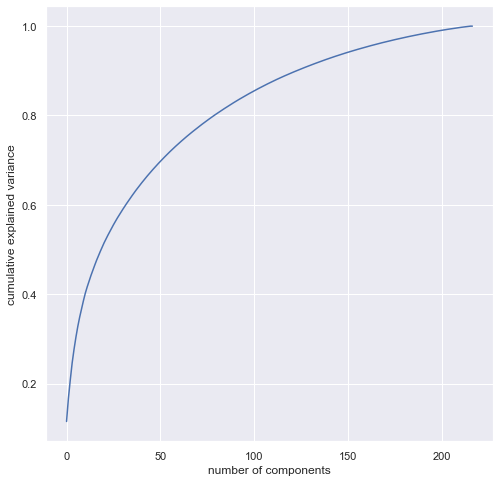

In [14]:
plt.figure(figsize=(8, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


## 3a) Calculate a statistic for every variable that describes its relationship with the class column.

### Question 3 a) Section 1: 
Calculate a statistic for every variable that describes its relationship with the class column.

### Answer:
I've left the review of the distribution of the feature sets correlation to the class label for this section. In an ideal dataset we'd expect to see some strong correlations to the class label however as the distribution below demonstrates this dataset is very weakly correlated to the class label. There are no correlations above 0.4(-0.4). This implies that there is not a strong realtionship between the classification and the data, we're therefore unlikely to create a highly accurate predictive algorithm without siginficant amounts of data.


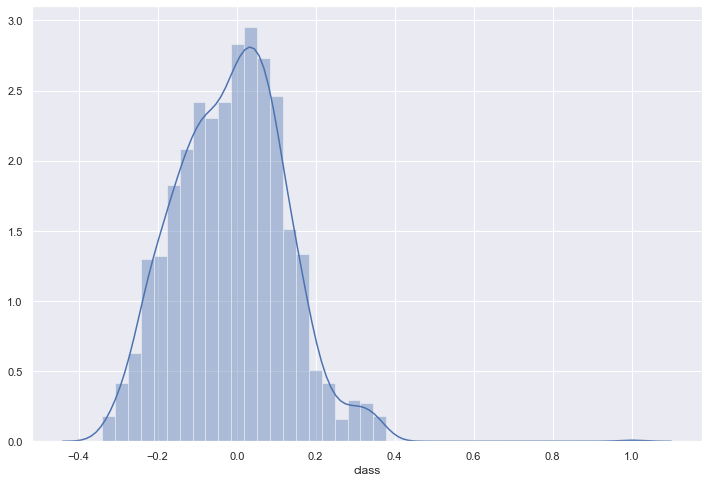

class            1.000000
Variable_1497    0.365952
Variable_1086    0.364550
Variable_734     0.363143
Variable_1432    0.362378
Name: class, dtype: float64
Variable_680    -0.313787
Variable_1119   -0.316670
Variable_1144   -0.331664
Variable_839    -0.334125
Variable_1083   -0.340748
Name: class, dtype: float64


In [15]:
class_df = corr.sort_values('class', ascending=False)

sns.set()
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(class_df['class']);
plt.show()
print(class_df['class'].head(5))
print(class_df['class'].tail(5))


### Question 3 a) Section 2: 
Don't list them all, but for the variable column with the most significant statistic, provide a visualization that shows its relationship with class. Include a brief paragraph describing your choices of statistic and visualization.

### Answer: 
I'll use a pair grid to demonstrate the correlation relationship between Variable_1497 and the class label. Obviously the class label is a bernoulli distribution therefore the correlation scatterplot is not hugely informative, however the use of a kernal denisty estimation plot counterpoints the scatterplot to highlight the offset within the Variable_1497 dsitribution between data point associated with 0 and 1. We can clearly see that this is a slightly positive correlation. 

Additionally we can see that Variable_1497 has a reasonable normal distrbution and that the 0 classification out weights the 1 classification by over 50%. 


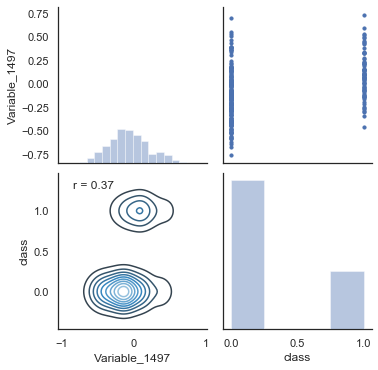

In [16]:
selected_columns = df[[ "Variable_1497", "class" ]]
corr_df = selected_columns.copy()

###############################################################################
####### Correlation Investigtion ##############################################
###############################################################################

from scipy import stats
sns.set(style="white")
attrlist6=[ "Variable_1497", "class" ]
                       
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(corr_df, palette=["red"], vars=attrlist6)
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False, hist=True)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)
plt.show()



## 3b) Calculate a statistic for every variable that describes its relationship with PC1 (i.e. the first principal component). 

### Question 3 b) Section 1: 
Calculate a statistic for every variable that describes its relationship with PC1 (i.e. the first principal component). 

### Answer:
One method for understanding which features are ‘important’ is to examine how each feature contributes to each principal component. To do this, we can take the dot product of our original data and our principal components.
The dot product of two vectors is the product of their magnitudes and the cosine of the angle between them. When two vectors are orthogonal, the dot product is zero, since cos(90°)=0. When two vectors lie along the same axis, the dot product is the product of their magnitudes.
Assuming our data is rescaled, the relative magnitudes of its dot product with the principal components will indicate the co-linearity or correlation of individual features and PCs. In other words, if a feature is nearly co-linear with a PC, the magnitude of the dot product will be relatively large.
The dot product we take is with the transpose of our original dataset and its PCA, which reveals an NxN matrix (where N is the number of features/PCs).


The dot product of the transpose of the original dataset (X_train) and its PCA (X_pca_dist) generates a new square matrix that informs how each feature correlates to each principal component.

The dot product of x and y using matrix multiplication is [[ 0.16309033 -0.53889023]
 [-0.46097942 -1.0149542 ]
 [ 0.09643861  0.11783057]
 ...
 [ 1.33019122  0.18476109]
 [-0.7711427  -0.50716199]
 [ 0.47229426 -0.51175405]]
The result has shape (1553, 2)


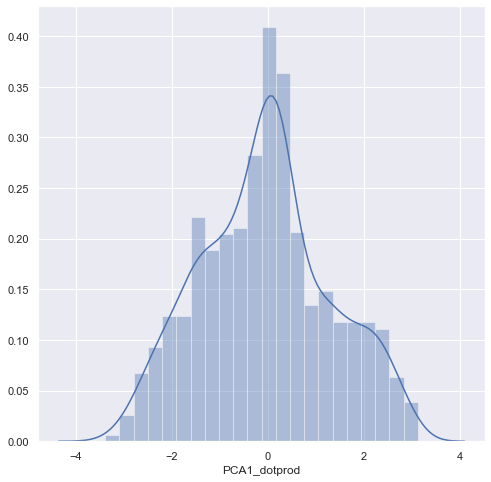

              index  PCA1_dotprod  PCA2_dotprod
1085  Variable_1086      3.122584      0.161064
197    Variable_198      3.090876     -0.217581
1253  Variable_1254      3.089090      0.608605
1428  Variable_1429      3.086177     -0.609222
1479  Variable_1480      3.031675     -0.072507


In [17]:
#re-run PCA restricting to PCA1 and PCA2
pca_dist = PCA(n_components=2)
X_pca_dist = pca_dist.fit_transform(X_train)

#Normalise
X_train_norm = normalize(X_train)
X_pca_norm = normalize(X_pca_dist)

#Calculate the dot product
dot_product = np.matmul(X_train_norm.T, X_pca_norm)  # Note that we have transposed X_train
print("The dot product of x and y using matrix multiplication is", dot_product)
print("The result has shape {}".format(dot_product.shape))

dotprod_df = pd.DataFrame(dot_product, columns=['PCA1_dotprod', 'PCA2_dotprod'])
transposed_df = df.transpose()
transposed_df = transposed_df.reset_index()
PCA_df = pd.concat([transposed_df['index'], dotprod_df], axis=1)
PCA_df = PCA_df.sort_values('PCA1_dotprod', ascending=False)

sns.set()
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(dotprod_df['PCA1_dotprod']);
plt.show()

print(PCA_df.head(5))


### Question 3 b) Section 2: 
For the variable with the most significant statistic, provide a visualization that shows its relationship with PC1. Include a brief paragraph describing your choices of statistic and visualization.

### Answer:
I've chosen to use multidimensional scaling to visualise the most signifcant PCA1 feature statistic relative to its peer statistics from PCA1. This enables the viewer to quickly ascertain the lack of a strong pattern within the dataset as it demonstrates that there are no strong eigenvalue features in our dataset. A strong eigenvalue would suggest a strong underlying pattern, you would expect to see a selection of data points distant from the main body, unfortunately our dataset does not exhibit these features.


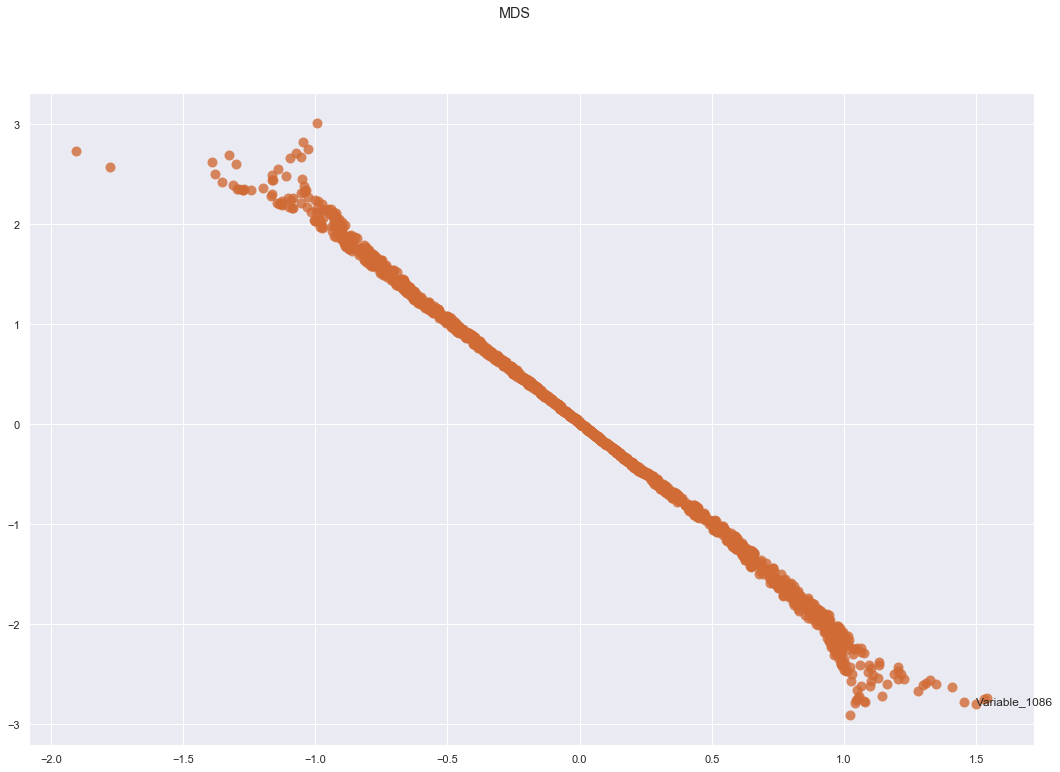

              index  PCA1_dotprod
1085  Variable_1086      3.122584
197    Variable_198      3.090876
1253  Variable_1254      3.089090
1428  Variable_1429      3.086177
1479  Variable_1480      3.031675
              index  PCA1_dotprod
1427  Variable_1428     -3.065691
1213  Variable_1214     -3.191221
6        Variable_7     -3.225288
1240  Variable_1241     -3.391081
1553          class           NaN


In [18]:
################################################################################
######### MDS Analysis #########################################################
################################################################################
sns.set()
PCA_df_2 = PCA_df.drop(['PCA2_dotprod'], axis=1)
numericColumns1 = PCA_df_2._get_numeric_data()
# keep place names and store them in a  
tnames = PCA_df_2.iloc[:, 0].values
# let's fill the missing values with mean()
numericColumns1 = numericColumns1.fillna(numericColumns1.mean())
# let's centralize the data
numericColumns1 -= numericColumns1.mean()
# now we compute the euclidean distances between the columns by passing the same data twice
distMatrix1 = euclidean_distances(numericColumns1, numericColumns1)
# first we generate an MDS object which returns
mds1 = manifold.MDS(n_components = 2, max_iter=3000, n_init=1, dissimilarity="precomputed")
Y11 = mds1.fit_transform(distMatrix1)

fig, ax = plt.subplots(figsize=(18,12))
plt.suptitle('MDS')
ax.scatter(Y11[:, 0], Y11[:, 1], c="#D06B36", s = 100, alpha = 0.8, linewidth='0')

for i, txt in enumerate(tnames):
        if(txt == PCA_df_2.iloc[0, 0]): #Only show the most siginifcant positive statistic 
            ax.annotate(txt, (Y11[:, 0][i],Y11[:, 1][i]), size=12)

plt.show()

print(PCA_df_2.head(5))
print(PCA_df_2.tail(5))

## 4) Create a classifier model predicting class of each sample using some or all of the variables in the dataset. 

### Question:
Use cross-validation to calculate the effectiveness of your classifier. Provide a short paragraph detailing your rationale for picking a classifier method, selecting a subset of variables for the model (if you did this), followed by a summary of your classifier's performance.

### Answer:
I will provide a summary answer at the end of section 4


### Approach:
I'm going to tackle this question in 3 ways:
- First I'll create a baseline prediction using the whole dataset with no dimensionality reduction
- Second I'll introduce PCA and use a mini grid search to demonstrate generalisation improvements by varying variance ratio
- Third I'll explore the feature extractions highlighted in section 1.a and 1.b and combine the generalisation with varying the PCA variance ratio.
The aim is to demontrate whether the feature extraction analysis has improved generalisation against a baseline prediction


### First I'll run a straight forward prediction using the complete dataset without any dimensionality reduction

Accuracy: 0.723 (0.077)


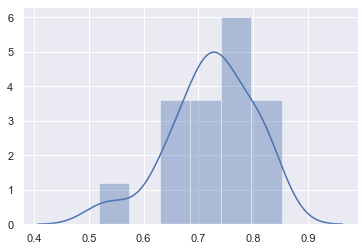

In [20]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# define the pipeline
steps = [ ('m', KNeighborsClassifier(n_neighbors = 13))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, Xnorm, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
sns.distplot(n_scores)
plt.show()

### Second I'll introduce PCA and use a mini grid search to demonstrate generalisation improvements by varying variance ratio

As can be seen in the results and the boxplot using PCA reducing the variance ratio to 95% improves our predictions by a small margin however there are outliers in the cross validation generalisation distribution.

>0.8 0.705 (0.068)
>0.81 0.710 (0.063)
>0.82 0.713 (0.073)
>0.83 0.718 (0.078)
>0.84 0.716 (0.077)
>0.85 0.712 (0.080)
>0.86 0.718 (0.078)
>0.87 0.716 (0.084)
>0.88 0.717 (0.085)
>0.89 0.723 (0.075)
>0.9 0.728 (0.082)
>0.91 0.729 (0.073)
>0.92 0.734 (0.077)
>0.93 0.733 (0.077)
>0.94 0.737 (0.083)
>0.95 0.737 (0.086)
>0.96 0.728 (0.079)
>0.97 0.726 (0.084)
>0.98 0.727 (0.077)
>0.99 0.730 (0.076)


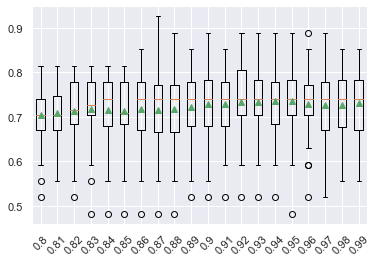

In [21]:
# get the dataset
def get_dataset():
    return Xnorm, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(80,100):
        m = i/100
        #steps = [('pca', PCA(m)), ('m', LogisticRegression())]
        steps = [ ('pca', PCA(m)), ('m', KNeighborsClassifier(n_neighbors = 13))]
        models[str(m)] = Pipeline(steps=steps)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

### Third I'll explore the feature extractions highlighted in section 1.a and 1.b

Accuracy: 0.793 (0.074)


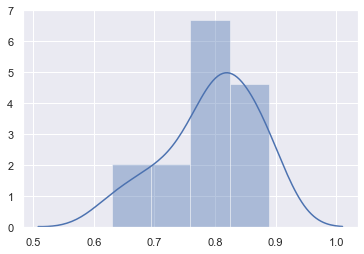

In [22]:
#############################################################################
#### The candidate features from Section 1.b ################################
#############################################################################
#                          "Variable_7", "Variable_42",   
#                          "Variable_73", "Variable_326", "Variable_346",
#                          "Variable_379", "Variable_396", "Variable_410",  
#                          "Variable_434", "Variable_439", "Variable_468",
#                          "Variable_469", "Variable_482", "Variable_574",  
#                          "Variable_713", "Variable_734", "Variable_748",
#                          "Variable_752", "Variable_757", "Variable_574",  
#                          "Variable_817", "Variable_839", "Variable_893", "Variable_894",
#                          "Variable_1001", "Variable_1041", "Variable_1119","Variable_1144",  
#                          "Variable_1180", "Variable_1187", "Variable_1241", 
#                          "Variable_1302", "Variable_1304", "Variable_1359", 
#                          "Variable_1407", "Variable_1419", "Variable_1497"

######################################################################################
#### Reasons why features were dropped from intial feature selection from Section 1.b
######################################################################################
# Dropped Due to strong correlations: "Variable_346", "Variable_734", "Variable_817", "Variable_894", 
# "Variable_1304", "Variable_469","Variable_1041",

# Dropped due to weak correlation to the "class" label: Variable_468", "Variable_1180", "Variable_326",

# Dropped due to weak PCA1 and PCA2 eigen values: "Variable_574", "Variable_1001", "Variable_434", 
# "Variable_42", "Variable_439", "Variable_63", "Variable_410", "Variable_713","Variable_839",

selected_columns = df[[   "Variable_7", "Variable_73", "Variable_379", "Variable_396",   
                          "Variable_482", "Variable_748", "Variable_752", "Variable_757",
                          "Variable_893", "Variable_1119","Variable_1144", "Variable_1187", 
                          "Variable_1241", "Variable_1302", "Variable_1359", "Variable_1407", 
                          "Variable_1419", "Variable_1497", 
                          "class" ]]


new_df = selected_columns.copy()
length = new_df.shape[1]-1
X_fe = new_df.iloc[:, 0:length].values
y_fe = new_df.iloc[:, length].values
X_fe_norm = normalize(X_fe)

# define the pipeline
steps = [ ('m', KNeighborsClassifier(n_neighbors = 13))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_fe_norm, y_fe, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
sns.distplot(n_scores)
plt.show()

### Finally I'll explore the feature extractions highlighted in section 1.a and 1.b combine the generalisation with varying the PCA variance ratio.

>0.8 0.780 (0.065)
>0.81 0.781 (0.065)
>0.82 0.775 (0.067)
>0.83 0.775 (0.067)
>0.84 0.775 (0.067)
>0.85 0.783 (0.072)
>0.86 0.783 (0.072)
>0.87 0.783 (0.072)
>0.88 0.778 (0.078)
>0.89 0.778 (0.078)
>0.9 0.775 (0.080)
>0.91 0.776 (0.081)
>0.92 0.776 (0.081)
>0.93 0.777 (0.076)
>0.94 0.777 (0.074)
>0.95 0.778 (0.077)
>0.96 0.782 (0.075)
>0.97 0.786 (0.077)
>0.98 0.794 (0.078)
>0.99 0.796 (0.080)


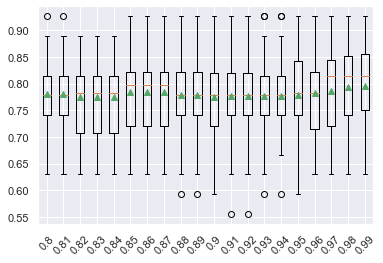

In [23]:
# get the dataset
def get_dataset():
    return X_fe_norm, y_fe
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(80,100):
        m = i/100
        steps = [ ('pca', PCA(m)), ('m', KNeighborsClassifier(n_neighbors = 13))]
        models[str(m)] = Pipeline(steps=steps)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

### Question 4:
Use cross-validation to calculate the effectiveness of your classifier. Provide a short paragraph detailing your rationale for picking a classifier method, selecting a subset of variables for the model (if you did this), followed by a summary of your classifier's performance.

### Answer:
Clearly the dataset dictates the choice of algortihm and this dataset exhibits low variance, strong feature correlations and weak classification correlation and is therefore ideal for a high bias low variance machine learning classifier. I've experimented with Logisitic Regression however I decided to choose a K Nearest Neighbour classifier as it gives me an opportunity to tune the classification around the noise within the dataset by varying the K hyperparameter. I've varied K manually as I've experimented with the dataset, for a larger dataset I would typically create a more formal hyperparameter grid search.

In terms of feature extraction we've already covered the analysis for creating the candidate list of features in section 1.a and 1.b using violin, swarm and correlation heatmap plots. However I've addtionally refined the features by experimentation using the following criteria:
- I've removed features that express strong inter-feature correlations in the section 1.b heatmap
- I've additionally removed features that exhibited very weak, or no, correlation with the "class" label
- I've iteratively experimented with PCA by reviewing the resultant PCA1 and PCA2 eigen values and dropped weak features that do not contribute to underlying pattern within the dataset

In terms of performance you can see that this dataset is a challenge due to the low variance, strong feature correlation and weak label correlations and the baseline only produces a generalisation accuracy of 72.3%. The PCA analysis improves this slightly to 73.7% (@ 95% variance ratio). I've been marginally more successful generalising the feature extracted dataset, reducing the feaures from 1553 dimensions down to 18, without PCA I've achieved a generalisation accuracy of 79.3% and with PCA a fractionally improved gerenalisation result of 79.6% (@ 99% variance ratio). Additionally, the variance within the cross validation generalisation results did not materially move from baseline to optimal feature extracted result.

# Conclusion

The notebook covers the analysis of the Data Science Challenge One dataset. The analysis intially explored the variance, probability density, correlation relationships and features within the dataset using visual analytical approaches: distribution plots, violin plots, swarm plots, correlation heatmaps, princpal components analysis, multidimensional scaling, kernal density estimation and predictive generalisation using K Nearest Neighbour. The study found that the dataset has a high number of dimensions with low number of observations and that the feature set is heavily correlated with low variance and a weak correlation to the classification label "class". There are only a few features that exhibit classification distributions against the "class" label, and they are also weak. Feature reduction analysis also discovered that the feature set could be dramatically reduced from 1553 to 18 dimensions. As the dataset exhibited low variance, a high bias machine learning predictive model was selected and with feature selection and PCA analysis a modest improvement to generalisation was observed. From a baseline result of 72.3% generalisation, via feature extraction, I improved the generalisation to 79.6%.